![display relevant image here](path/url/to/image)
- Banner/header image

# Title
- Relevant to Data and Business Context

## Overview
- BLUF (Bottom Line Up Front)
- One paragraph summary of final model performance and business implications
- Frame your 'story'

## Business Understanding

1. Begin by thoroughly analyzing the business context of FinTech Innovations' loan approval process. Write a short summary that:
- Describes the current manual process and its limitations
- Identifies key stakeholders and their needs
- Explains the implications of different types of model errors
- Justifies your choice between classification and regression approaches

- The current loan approval process is done manually by individuals at FinTech.  This leads to slower response time to loan applicants and can also lead to inconsistent decisions due to different individuals reviewing loans.  Each inappropriate loan given, or not given, leads to money lost by FinTech.  If a loan is declined for someone who was credit worth and should have been approved, FinTech profit is down by 8k.  If a loan is approved for an applicant who should have been denied, the average loss is 50k.  This makes the CFO and other officials in the company key stakeholders as it directly impacts the profit and/or loss of the company.  Also the loan approvers are key stakeholders as they will be using the model to make final decisions on loans to the customers.
- There are different types of model errors which can be useful in these scenarios.  Recall will allow for more false negatives.  meaning that you will be able to get more customers approved, adding 8K to the profit.  Precision focuses on false positives.  So it'll minimize the number of false positives, meaning it'll minimize the number of 50k loss the company takes.  Accuracy takes into account both false positives and false negatives and tries to make the model as accurate as possible as the name would describe.  F1-score is the score that finds the balance between precision and recall.  Given the impact of approving bad loans, precision would be more important in this scenario as you want to make sure all approved loans are true positives as much as possible.
- The model choice between categorical (approved, denied) and regressional (risk score) is a business decision.  Whether you would want the final say to be by the model making it more consistent, but also could miss ambiguous data that is not present.  Or would you want the final decision to be by an employee who reviews the risk score and makes final decision.  Both approches would suffice, but risk score would give more of an overall risk assessment on the loan.  However, since the goal is to standardize loan approval process, rather than having an employee make the final decision, a classification model would fit best for complete standardization.


- 
2. Define your modeling goals and success criteria:
- Select appropriate evaluation metrics based on business impact
- You must use at least two different metrics
- Consider creating custom metric
- Establish baseline performance targets
- Document your reasoning for each choice


## Data Understanding
3. Conduct comprehensive exploratory data analysis:
- Describe basic data characteristics
- Examine distributions of all features and target variables
- Investigate relationships between features
- Create visualizations to help aid in EDA
- Document potential data quality issues and their implications

4. Develop feature understanding:
- Categorize features by type (numerical, categorical, ordinal)
- Identify features requiring special preprocessing
- Document missing value patterns and their potential meanings
- Note potential feature engineering opportunities


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier

In [2]:
# EDA Code Here - Create New Cells As Needed

#Load in finaincial_loan_data.csv into panda dataframe
df_financial_loan = pd.read_csv('financial_loan_data.csv')

In [3]:
#Display column info for data
df_financial_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  object 
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              19099 non-null  object 
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               18669 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [4]:
# Data on numerical columns
df_financial_loan.describe()

,Age,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,0.993000,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,0.986965,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,0.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,1.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,2.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,7.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [5]:
#display first 5 rows
df_financial_loan.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,"$39,948.00",617,Employed,Master,22,13152,48,Married,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,"$39,709.00",628,Employed,Associate,15,26045,48,Single,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,"$40,724.00",570,Employed,Bachelor,26,17627,36,NaN,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,"$69,084.00",545,Employed,High School,34,37898,96,Single,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,"$103,264.00",594,Employed,Associate,17,9184,36,Married,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [6]:
#display number of Null values for each row
df_financial_loan.isnull().sum()

Age                              0
AnnualIncome                     0
CreditScore                      0
EmploymentStatus                 0
EducationLevel                 901
Experience                       0
LoanAmount                       0
LoanDuration                     0
MaritalStatus                 1331
NumberOfDependents               0
HomeOwnershipStatus              0
MonthlyDebtPayments              0
CreditCardUtilizationRate        0
NumberOfOpenCreditLines          0
NumberOfCreditInquiries          0
DebtToIncomeRatio                0
BankruptcyHistory                0
LoanPurpose                      0
PreviousLoanDefaults             0
PaymentHistory                   0
LengthOfCreditHistory            0
SavingsAccountBalance          572
CheckingAccountBalance           0
TotalAssets                      0
TotalLiabilities                 0
MonthlyIncome                    0
UtilityBillsPaymentHistory       0
JobTenure                        0
NetWorth            

In [7]:
# Load in Kaggle data
df_loan = pd.read_csv("Loan.csv")

In [8]:
# Display column info
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [9]:
# Numerical data description
df_loan.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [10]:
# First 5 rows
df_loan.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [11]:
# Null value summary - Kaggle Data
df_loan.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [12]:
print(df_loan.duplicated().sum())

0


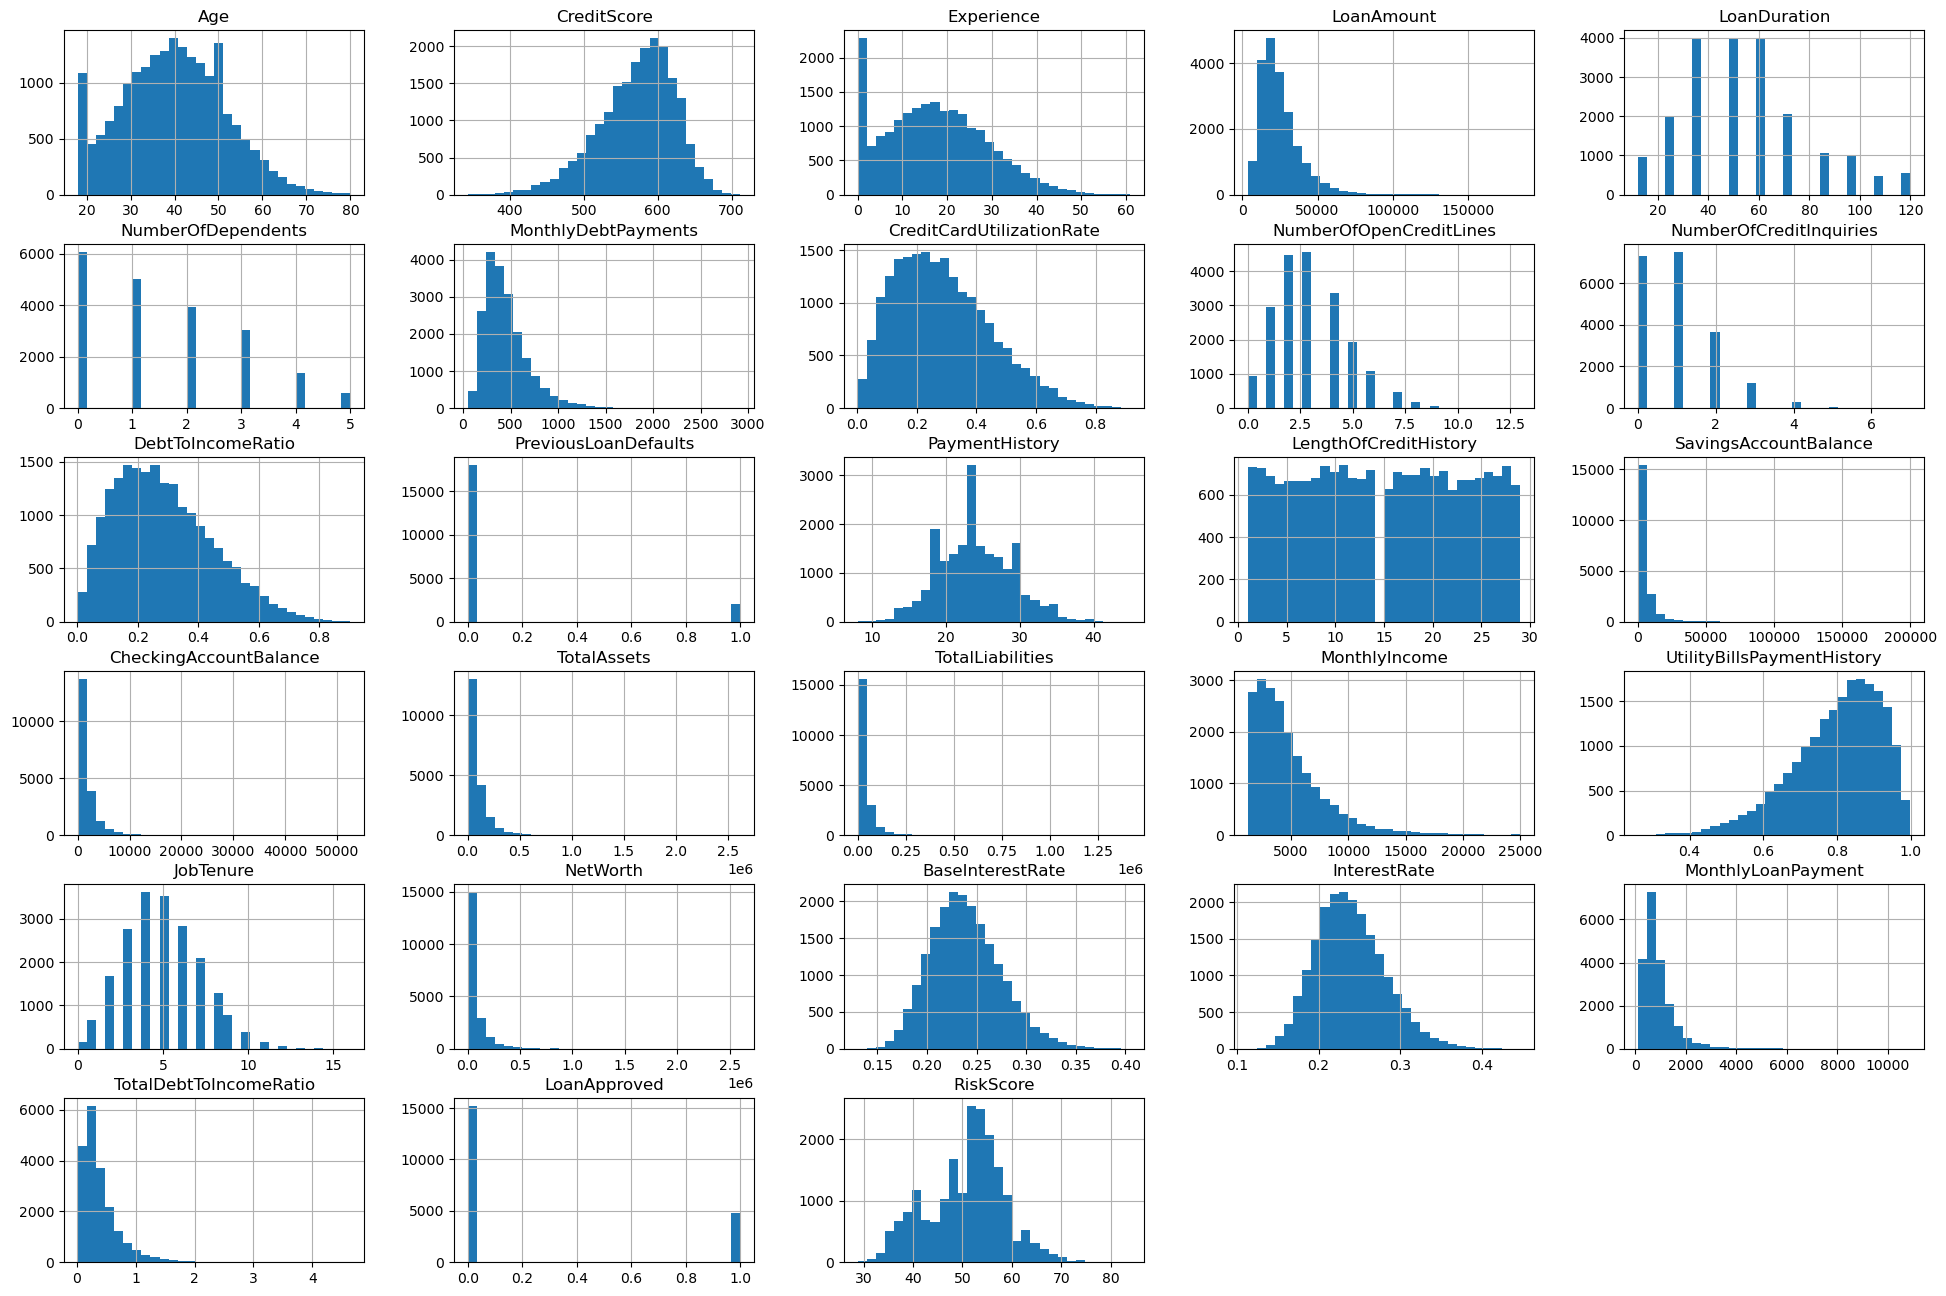

In [13]:
# Plot graphs for data distribution per column
df_financial_loan.hist(figsize=(24, 16), bins=30)
plt.show()

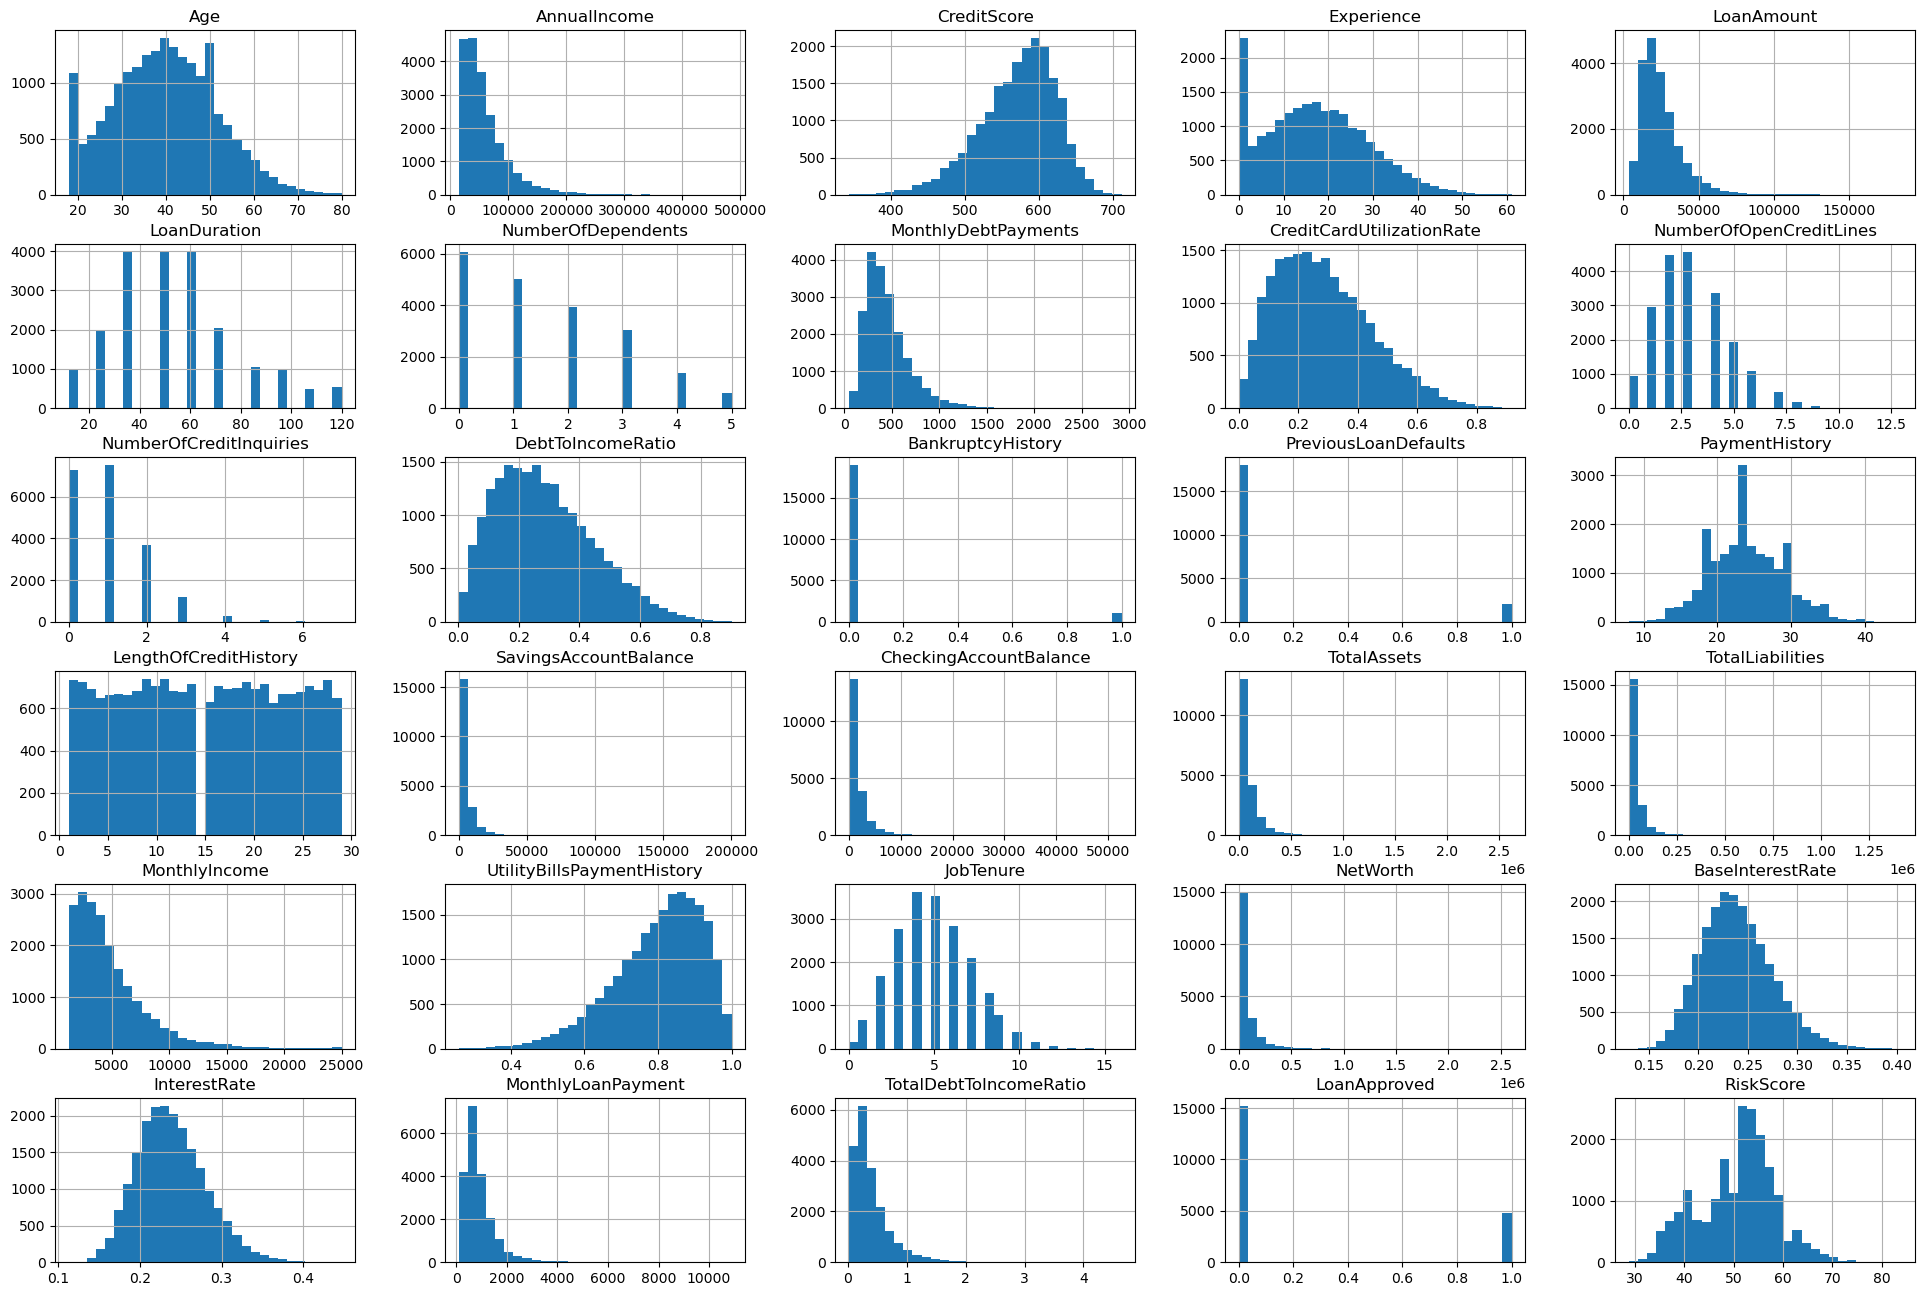

In [14]:
# Graphs for Kaggle data
df_loan.hist(figsize=(24, 16), bins=30)
plt.show()

In [15]:
#View Categorical counts for financial loan csv
categorical_df_financial_loan = df_financial_loan.select_dtypes(exclude=['number'])

categorical_df_financial_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AnnualIncome         20000 non-null  object
 1   EmploymentStatus     20000 non-null  object
 2   EducationLevel       19099 non-null  object
 3   MaritalStatus        18669 non-null  object
 4   HomeOwnershipStatus  20000 non-null  object
 5   BankruptcyHistory    20000 non-null  object
 6   LoanPurpose          20000 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


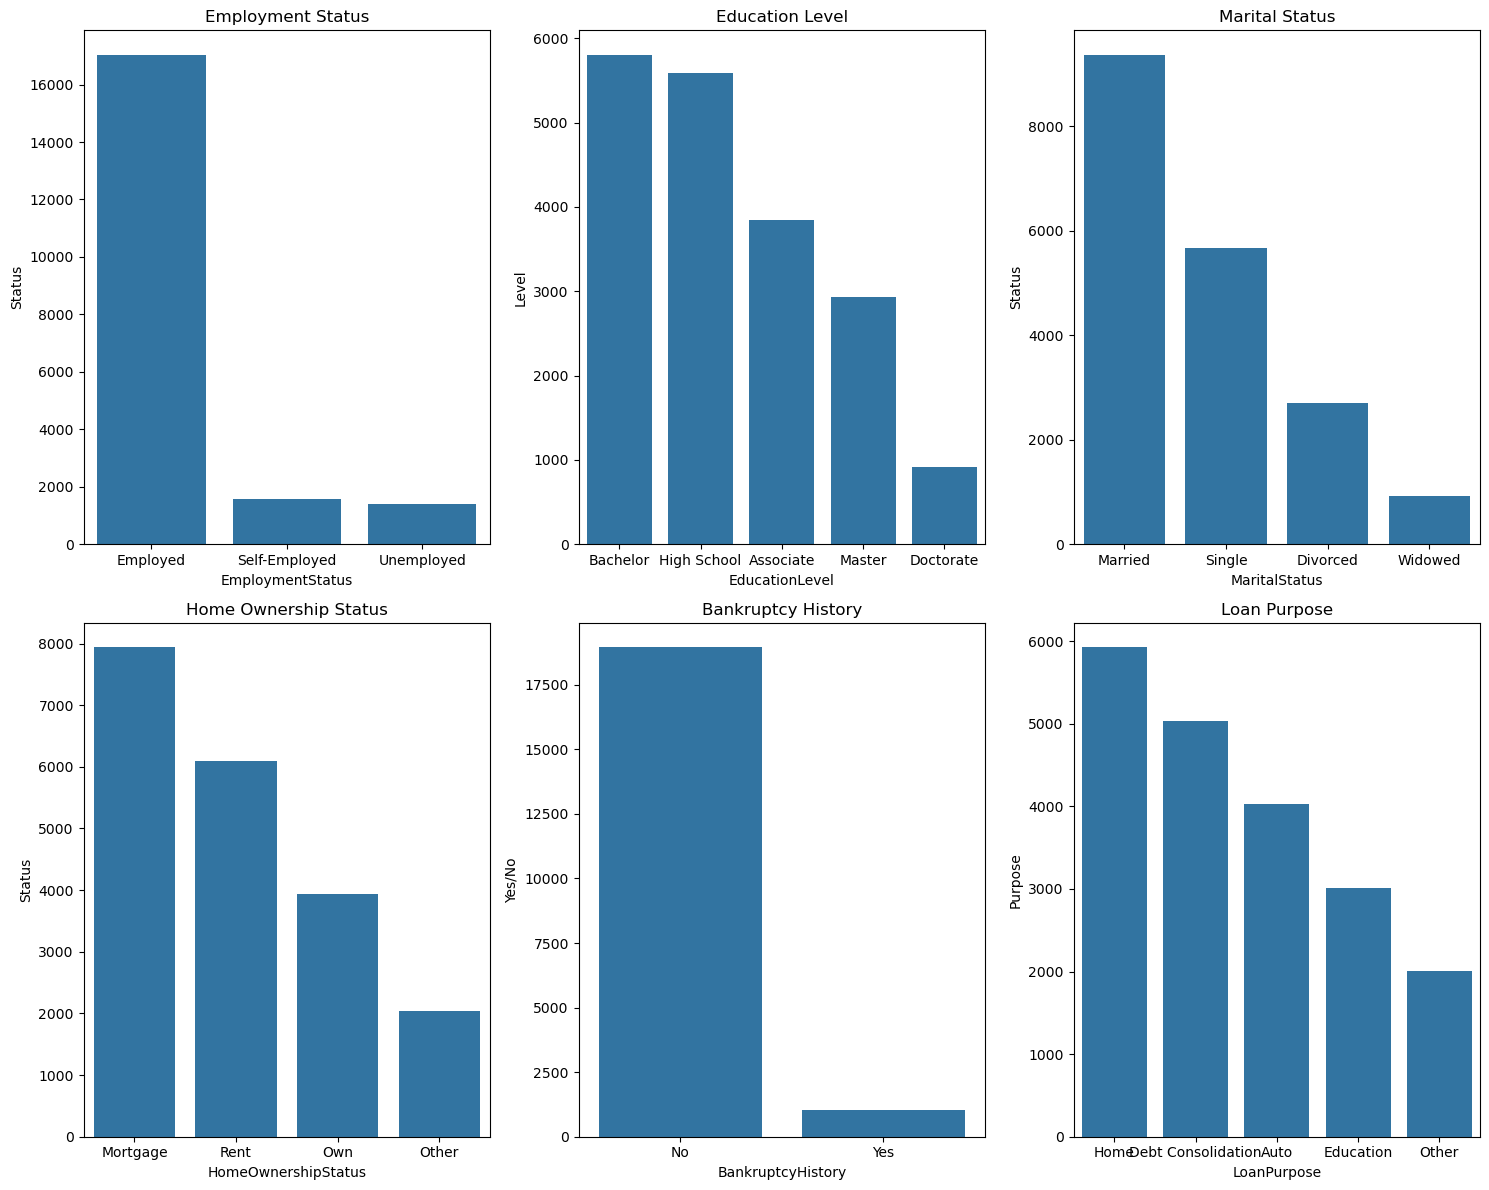

In [16]:
# Figure plot
plt.figure(figsize=(15, 12))

# Create subplots for each categorical feature - use the return rate objects above
# Product Category
plt.subplot(2, 3, 1)
category_bar = sns.barplot(categorical_df_financial_loan['EmploymentStatus'].value_counts())
plt.title('Employment Status')
plt.ylabel('Status')

# Seasonal Item
plt.subplot(2, 3, 2)
seasonal_bar = sns.barplot(categorical_df_financial_loan['EducationLevel'].value_counts())
plt.title('Education Level')
plt.ylabel('Level')

# Advertised As
plt.subplot(2, 3, 3)
advertised_bar = sns.barplot(categorical_df_financial_loan['MaritalStatus'].value_counts())
plt.title('Marital Status')
plt.ylabel('Status')

plt.subplot(2, 3, 4)
advertised_bar = sns.barplot(categorical_df_financial_loan['HomeOwnershipStatus'].value_counts())
plt.title('Home Ownership Status')
plt.ylabel('Status')

plt.subplot(2, 3, 5)
advertised_bar = sns.barplot(categorical_df_financial_loan['BankruptcyHistory'].value_counts())
plt.title('Bankruptcy History')
plt.ylabel('Yes/No')

plt.subplot(2, 3, 6)
advertised_bar = sns.barplot(categorical_df_financial_loan['LoanPurpose'].value_counts())
plt.title('Loan Purpose')
plt.ylabel('Purpose')

plt.tight_layout()
plt.show()

In [17]:
categorical_df_loan = df_loan.select_dtypes(exclude=['number'])

categorical_df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ApplicationDate      20000 non-null  object
 1   EmploymentStatus     20000 non-null  object
 2   EducationLevel       20000 non-null  object
 3   MaritalStatus        20000 non-null  object
 4   HomeOwnershipStatus  20000 non-null  object
 5   LoanPurpose          20000 non-null  object
dtypes: object(6)
memory usage: 937.6+ KB


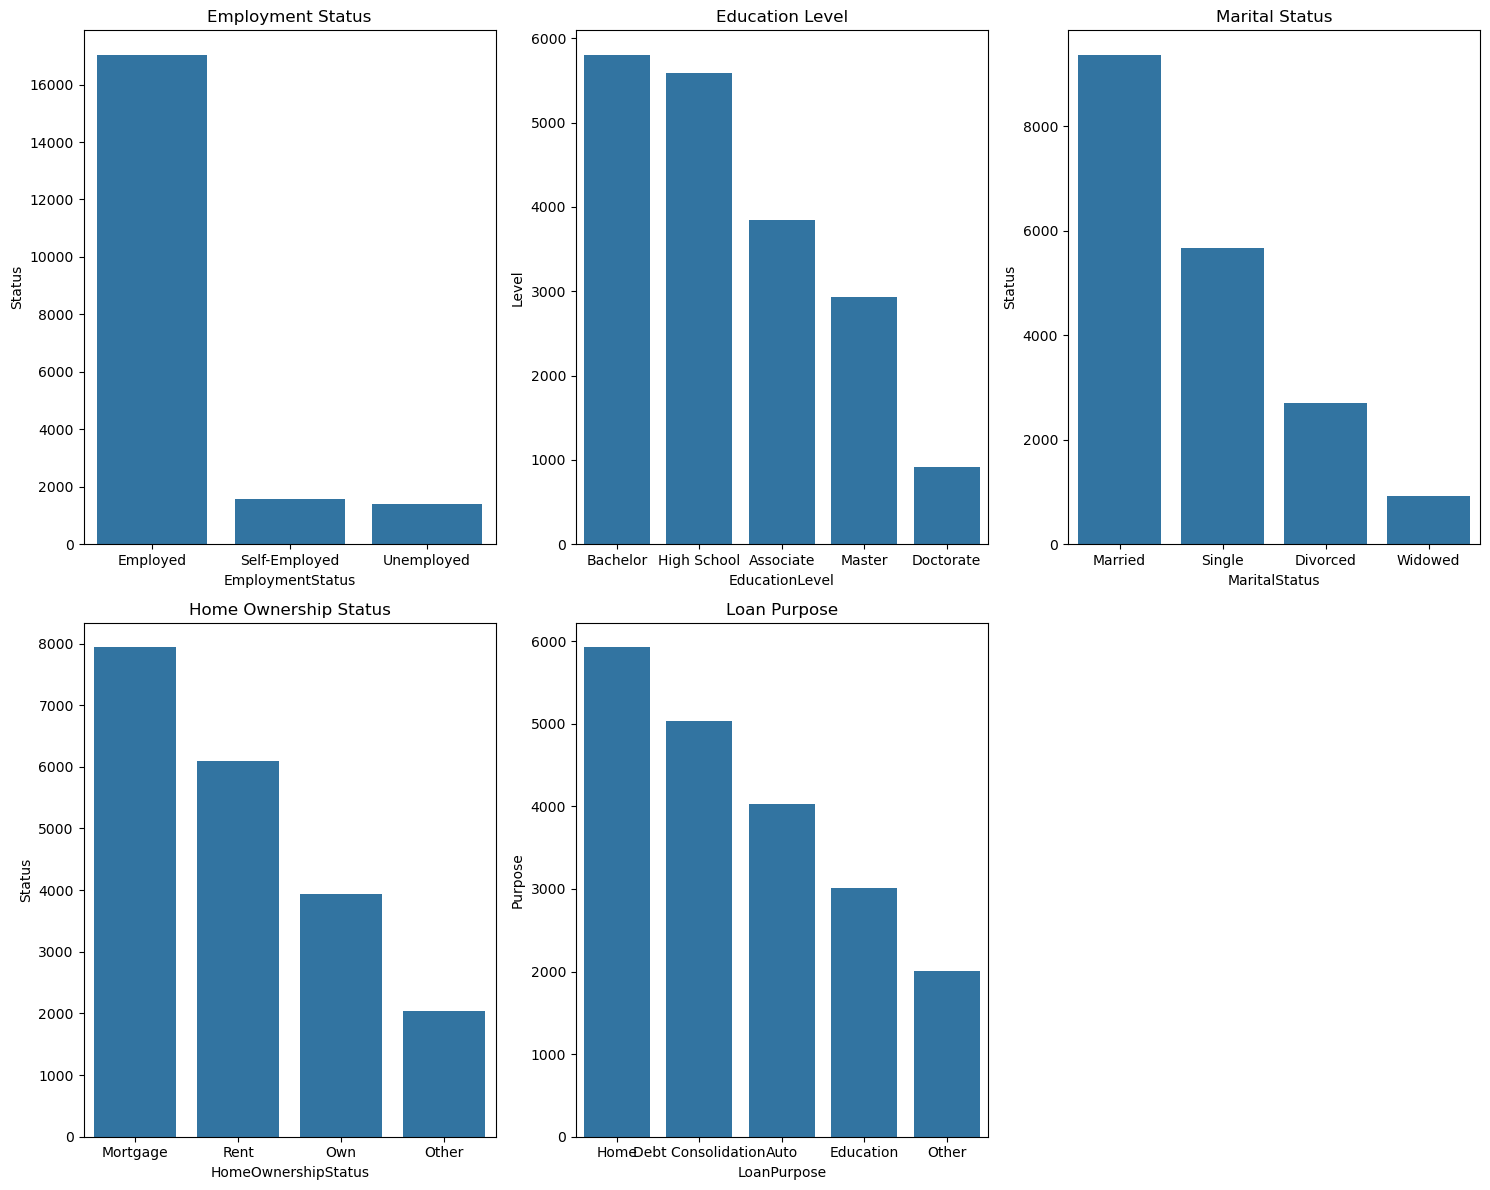

In [18]:
# Figure plot
plt.figure(figsize=(15, 12))

# Create subplots for each categorical feature - use the return rate objects above
# Product Category
plt.subplot(2, 3, 1)
category_bar = sns.barplot(categorical_df_financial_loan['EmploymentStatus'].value_counts())
plt.title('Employment Status')
plt.ylabel('Status')

# Seasonal Item
plt.subplot(2, 3, 2)
seasonal_bar = sns.barplot(categorical_df_financial_loan['EducationLevel'].value_counts())
plt.title('Education Level')
plt.ylabel('Level')

# Advertised As
plt.subplot(2, 3, 3)
advertised_bar = sns.barplot(categorical_df_financial_loan['MaritalStatus'].value_counts())
plt.title('Marital Status')
plt.ylabel('Status')

plt.subplot(2, 3, 4)
advertised_bar = sns.barplot(categorical_df_financial_loan['HomeOwnershipStatus'].value_counts())
plt.title('Home Ownership Status')
plt.ylabel('Status')

plt.subplot(2, 3, 5)
advertised_bar = sns.barplot(categorical_df_financial_loan['LoanPurpose'].value_counts())
plt.title('Loan Purpose')
plt.ylabel('Purpose')

plt.tight_layout()
plt.show()

In [19]:
#Set education level for Oridnal encoding later
education_levels = [['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']]

In [20]:
#Remove Dollar sign and comma's from annual income and convert to number datatype
df_financial_loan["AnnualIncome"] = df_financial_loan["AnnualIncome"].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_financial_loan['AnnualIncome']

0         39948.0
1         39709.0
2         40724.0
3         69084.0
4        103264.0
           ...   
19995     30180.0
19996     49246.0
19997     48958.0
19998     41025.0
19999     53227.0
Name: AnnualIncome, Length: 20000, dtype: float64

In [21]:
#Create new DF without categorical data for correlation matrix
numerical_df_financial_loan = df_financial_loan.select_dtypes(include=['number'])
numerical_df_loan = df_loan.select_dtypes(include=['number'])



In [22]:
#Get the correlation Matrix for the numerical data
correlation_fl = numerical_df_financial_loan.corr()
correlation_l = numerical_df_loan.corr()

In [23]:
#Financial Loan data for loan approved and risk score
corr_fl_filtered = correlation_fl.loc[:, ['LoanApproved', 'RiskScore']]
corr_fl_filtered

,LoanApproved,RiskScore
Age,0.141029,-0.164304
AnnualIncome,0.597900,-0.483289
CreditScore,0.142000,-0.240198
Experience,0.140755,-0.166496
LoanAmount,-0.239496,0.137981
LoanDuration,-0.094558,0.054550
NumberOfDependents,0.001717,0.001686
MonthlyDebtPayments,-0.070415,0.036938
CreditCardUtilizationRate,-0.010466,0.108758
NumberOfOpenCreditLines,-0.004769,0.007762


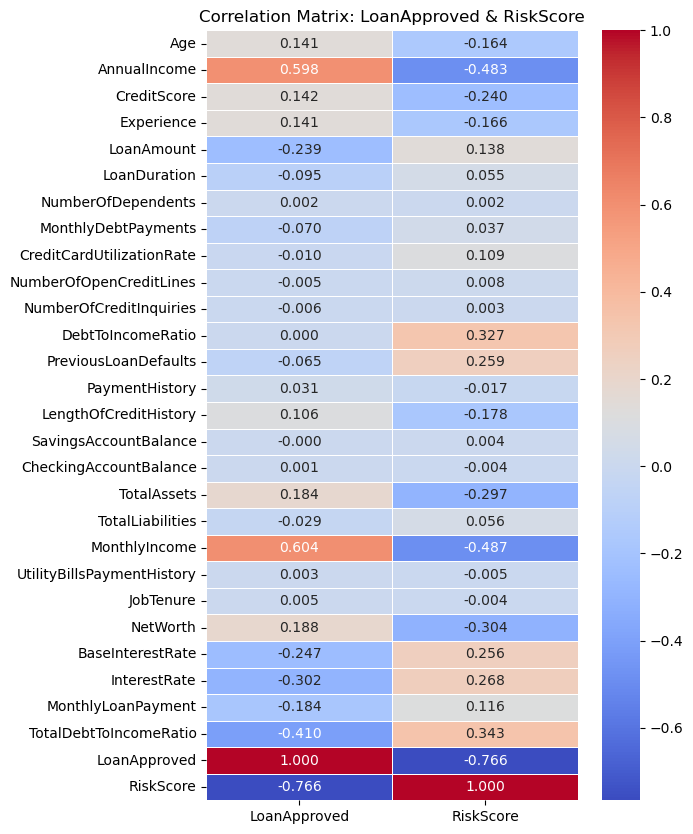

In [24]:
#Visually display correlation matrix

plt.figure(figsize=(6, 10))
sns.heatmap(corr_fl_filtered, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix: LoanApproved & RiskScore")
plt.show()


In [25]:
#Kaggle Data correlation Matrix for Loan approved and risk score
corr_l_filtered = correlation_l.loc[:, ['LoanApproved', 'RiskScore']]
corr_l_filtered

,LoanApproved,RiskScore
Age,0.141029,-0.164304
AnnualIncome,0.597900,-0.483289
CreditScore,0.142000,-0.240198
Experience,0.140755,-0.166496
LoanAmount,-0.239496,0.137981
LoanDuration,-0.094558,0.054550
NumberOfDependents,0.001717,0.001686
MonthlyDebtPayments,-0.070415,0.036938
CreditCardUtilizationRate,-0.010466,0.108758
NumberOfOpenCreditLines,-0.004769,0.007762


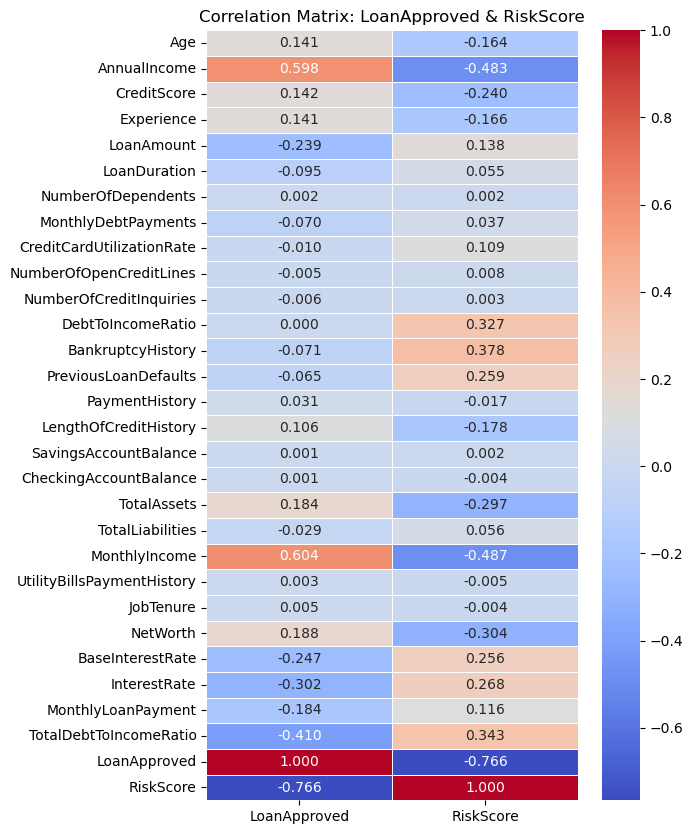

In [26]:
#Visualize Kaggle correlation Matrix

plt.figure(figsize=(6, 10))
sns.heatmap(corr_l_filtered, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix: LoanApproved & RiskScore")
plt.show()

In [27]:
#Look at the data types for the financial loan data
df_financial_loan.dtypes

Age                             int64
AnnualIncome                  float64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory              object
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance         float64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncome                 float64
UtilityBills

In [28]:
#Get all non numerical data
category_df_fl = df_financial_loan.select_dtypes(exclude=['number'])

category_df_fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmploymentStatus     20000 non-null  object
 1   EducationLevel       19099 non-null  object
 2   MaritalStatus        18669 non-null  object
 3   HomeOwnershipStatus  20000 non-null  object
 4   BankruptcyHistory    20000 non-null  object
 5   LoanPurpose          20000 non-null  object
dtypes: object(6)
memory usage: 937.6+ KB


In [29]:
#Check unique values of columns - not including annual income as it is numerical but contains a $
print(category_df_fl['EmploymentStatus'].unique())
print(category_df_fl['EducationLevel'].unique())
print(category_df_fl['MaritalStatus'].unique())
print(category_df_fl['HomeOwnershipStatus'].unique())
print(category_df_fl['BankruptcyHistory'].unique())
print(category_df_fl['LoanPurpose'].unique())

['Employed' 'Self-Employed' 'Unemployed']
['Master' 'Associate' 'Bachelor' 'High School' nan 'Doctorate']
['Married' 'Single' nan 'Divorced' 'Widowed']
['Own' 'Mortgage' 'Rent' 'Other']
['No' 'Yes']
['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']


In [30]:
#Check data types for Kaggle data
df_loan.dtypes

ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncom

In [31]:
#Get non numerical columns
category_df_l = df_loan.select_dtypes(exclude=['number'])

#View columns
category_df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ApplicationDate      20000 non-null  object
 1   EmploymentStatus     20000 non-null  object
 2   EducationLevel       20000 non-null  object
 3   MaritalStatus        20000 non-null  object
 4   HomeOwnershipStatus  20000 non-null  object
 5   LoanPurpose          20000 non-null  object
dtypes: object(6)
memory usage: 937.6+ KB


In [32]:
#Check unique values of columns - not including application date as it would be uniqueish
print(category_df_l['EmploymentStatus'].unique())
print(category_df_l['EducationLevel'].unique())
print(category_df_l['MaritalStatus'].unique())
print(category_df_l['HomeOwnershipStatus'].unique())
print(category_df_l['LoanPurpose'].unique())

['Employed' 'Self-Employed' 'Unemployed']
['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']
['Married' 'Single' 'Divorced' 'Widowed']
['Own' 'Mortgage' 'Rent' 'Other']
['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']


In [33]:
#View application date column
category_df_l['ApplicationDate']

0        2018-01-01
1        2018-01-02
2        2018-01-03
3        2018-01-04
4        2018-01-05
            ...    
19995    2072-09-29
19996    2072-09-30
19997    2072-10-01
19998    2072-10-02
19999    2072-10-03
Name: ApplicationDate, Length: 20000, dtype: object

In [34]:
fl_numerical_features = df_financial_loan.select_dtypes(include=['number']).columns.tolist()
fl_numerical_features.remove('RiskScore')
fl_numerical_features.remove('LoanApproved')
#l_numerical_columns = df_loan.select_dtypes(include=['number']).columns.tolist()

# Set numerical columns based on the correlation matrix - chose values with an importance >= |.095|
#fl_numerical_features = ['Age', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'LengthOfCreditHistory', 'TotalAssets', 'MonthlyIncome', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio']

l_numerical_features = ['Age', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'LengthOfCreditHistory', 'TotalAssets', 'MonthlyIncome', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio']

In [35]:
#Get categorical columns - not including date and/or annual income
l_categorical_features = ['EmploymentStatus', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']
fl_categorical_features = ['EmploymentStatus', 'MaritalStatus', 'HomeOwnershipStatus', 'BankruptcyHistory', 'LoanPurpose']

In [36]:
fl_ordinal_features = ['EducationLevel']
l_ordinal_features = ['EducationLevel']

## Data Preparation
5. Design your preprocessing strategy:
- Create separate preprocessing flows for different feature types
- Must utilize ColumnTransformer and Pipeline
- Consider using FeatureUnion as well
- Handle missing values appropriately for each feature
- Handle Categorical and Ordinal data appropriately
- Scale numeric values if model requires it (linear model)
- Document your reasoning for each preprocessing decision



In [37]:
# Data Prep Code Here - Create New Cells As Needed

#Start numerical transformation
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [38]:
#Categorical transformation
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [39]:
#Ordinal tranformation
ordinal_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=education_levels))
])


In [40]:
#Preprocessor for financial_loan_data.csv
preprocessor_fl = ColumnTransformer([
    ('num', numerical_transformer, fl_numerical_features),
    ('cat', categorical_transformer, fl_categorical_features),
    ('ord', ordinal_transformer, fl_ordinal_features)
])

#preprocessor for Kaggle data
preprocessor_l = ColumnTransformer([
    ('num', numerical_transformer, l_numerical_features),
    ('cat', categorical_transformer, l_categorical_features),
    ('ord', ordinal_transformer, fl_ordinal_features)
])


In [62]:
def balanced_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 0.8 * precision + 0.2 * recall

custom_scorer = make_scorer(balanced_score)

## Modeling
6. Implement your modeling approach:
- Choose appropriate model algorithms based on your problem definition
- Set up validation strategy with chosen metrics
- Use a train test split and cross validation
- Create complete pipeline including any preprocessing and model
- Document your reasoning for each modeling decision

7. Optimize your model:
- Define parameter grid based on your understanding of the algorithms
- Implement GridSearchCV and/or RandomizedSearchCV with chosen metrics
- Consider tuning preprocessing steps
- Track and document the impact of different parameter combinations
- Consider the trade-offs between different model configurations

NOTE: Be mindful of time considerations - showcase “how to tune” 


## Calculate Loan Approval directly using financial_loan_data.csv

## Logistical Regression

In [82]:
#  Modeling Code Here - Create New Cells as Needed
#Logistic Regression on given financial_loan_data.csv data
# Set features and targets

feature_list = fl_numerical_features + fl_categorical_features + fl_ordinal_features

X_fl = df_financial_loan[feature_list]
y_fl = df_financial_loan['LoanApproved']

#Split data 80% training, 20% testing
X_fl_train, X_fl_test, y_fl_train, y_fl_test = train_test_split(X_fl, y_fl, test_size=0.2, random_state=42)

#logistic regression pipeline
lr_pipeline = Pipeline([
    ("preprocessor", preprocessor_fl),
    ("classifier", LogisticRegression(random_state=42, max_iter=2000))
])

#Fit the model
lr_pipeline.fit(X_fl_train, y_fl_train)

#print shape of split test/training data
X_fl_train.shape, X_fl_test.shape, y_fl_train.shape, y_fl_test.shape

((16000, 33), (4000, 33), (16000,), (4000,))

In [83]:
#validate base model performance
y_fl_pred = lr_pipeline.predict(X_fl_test)

#get approval probability
y_fl_proba = lr_pipeline.predict_proba(X_fl_test)[:,1]

In [84]:
#calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_fl_test, y_fl_pred)
precision = precision_score(y_fl_test, y_fl_pred)
recall = recall_score(y_fl_test, y_fl_pred)
f1 = f1_score(y_fl_test, y_fl_pred)

#view results
accuracy, precision, recall, f1

(0.9625, 0.939209726443769, 0.911504424778761, 0.9251497005988023)

In [85]:
#confusion Matrix
conf_matrix = confusion_matrix(y_fl_test, y_fl_pred)
tn, fp, fn, tp = confusion_matrix(y_fl_test, y_fl_pred).ravel()
conf_matrix

array([[2923,   60],
       [  90,  927]])

Total Loss in Model: $3720000


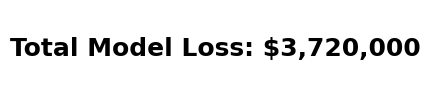

In [86]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

plt.figure(figsize=(3, 1))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=18, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()


0.9950387495710699


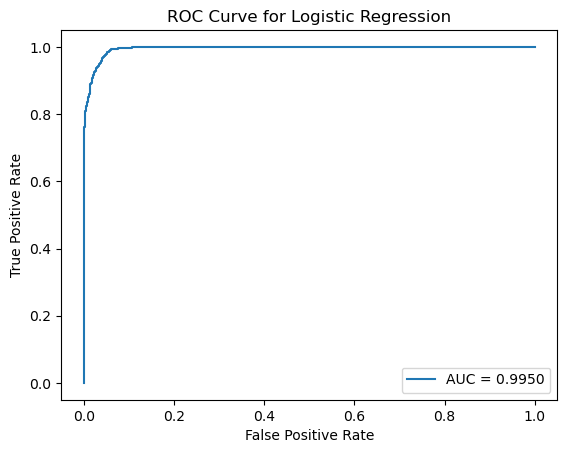

In [46]:
#Calculate AUC score and display ROC curve
auc_score = roc_auc_score(y_fl_test, y_fl_proba)

print(auc_score)


fpr, tpr, threshold = roc_curve(y_fl_test, y_fl_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()


In [51]:
#Get the parameters from the model
params = lr_pipeline.get_params()

params['classifier'].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 2000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Precision Logistical

In [47]:
#Performing grid search for best precision model

#Set parameter grid
log_param_grid = {'classifier__C': [0.01, 0.1, 1, 10],
                  'classifier__penalty': ['l1', 'l2'],
                  'classifier__solver': ['liblinear', 'saga']
}

#perform grid search using percision
log_grid_search = GridSearchCV(lr_pipeline, log_param_grid, cv=5, scoring='precision', n_jobs=-1)

#Fit the model
log_grid_search.fit(X_fl_train, y_fl_train)

#Print results
print("Best parameters:", log_grid_search.best_params_)
print("Best precision:", log_grid_search.best_score_)


Best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best precision: 0.9353380892820706


In [48]:
#Get best model
best_lr_model = log_grid_search.best_estimator_

#Fit best model
best_lr_model.fit(X_fl_train, y_fl_train)

#Calculate prediction
best_y_pred_lr = best_lr_model.predict(X_fl_test)
best_y_proba_lr = best_lr_model.predict_proba(X_fl_test)[:, 1]

#Calculate estimators
accuracy_lr = accuracy_score(y_fl_test, best_y_pred_lr)
precision_lr = precision_score(y_fl_test, best_y_pred_lr)
recall_lr = recall_score(y_fl_test, best_y_pred_lr)
f1_lr = f1_score(y_fl_test, best_y_pred_lr)

#Print estimator values
accuracy_lr, precision_lr, recall_lr, f1_lr

(0.95075, 0.9427645788336934, 0.8584070796460177, 0.8986103962943902)

In [49]:
#Confusion matrix
cm_log = confusion_matrix(y_fl_test, best_y_pred_lr)
tn, fp, fn, tp = confusion_matrix(y_fl_test, best_y_pred_lr).ravel()
cm_log

array([[2930,   53],
       [ 144,  873]])

Total Loss in Model: $3802000


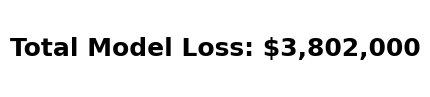

In [50]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

plt.figure(figsize=(3, 1))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=18, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()


In [56]:
# Loss = $4,354,000

## Custom Metric Logistical 80% Precision, 20% Recall

In [87]:
# Using a custom metric for caluclated score where precision is 90% weighted and recall is 10% rated
def balanced_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 0.8 * precision + 0.2 * recall

custom_scorer = make_scorer(balanced_score)

log_grid_search_cust = GridSearchCV(lr_pipeline, log_param_grid, cv=5, scoring=custom_scorer, n_jobs=-1)

#Fit the model
log_grid_search_cust.fit(X_fl_train, y_fl_train)

#Print results
print("Best parameters:", log_grid_search_cust.best_params_)
print("Best precision:", log_grid_search_cust.best_score_)

Best parameters: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best precision: 0.9302478511949209


In [88]:
#Get best model for custom score & fit
best_cust_lr = log_grid_search_cust.best_estimator_
best_cust_lr.fit(X_fl_train, y_fl_train)

# Predictions
best_y_pred_lr_cust = best_cust_lr.predict(X_fl_test)
best_y_proba_lr_cust = best_cust_lr.predict_proba(X_fl_test)[:, 1]

#Evaluation metrics
accuracy_lr_cust = accuracy_score(y_fl_test, best_y_pred_lr_cust)
precision_lr_cust = precision_score(y_fl_test, best_y_pred_lr_cust)
recall_lr_cust = recall_score(y_fl_test, best_y_pred_lr_cust)
f1_lr_cust = f1_score(y_fl_test, best_y_pred_lr_cust)

accuracy_lr_cust, precision_lr_cust, recall_lr_cust, f1_lr_cust

(0.96225, 0.9382591093117408, 0.911504424778761, 0.9246882793017456)

In [91]:
#AOC Score
auc_score_cust = roc_auc_score(y_fl_test, best_y_proba_lr_cust)

print(auc_score_cust)

0.9950347940196017


In [89]:
cust_cm = confusion_matrix(y_fl_test, best_y_pred_lr_cust)
tn, fp, fn, tp = confusion_matrix(y_fl_test, best_y_pred_lr_cust).ravel()
cust_cm

array([[2922,   61],
       [  90,  927]])

Total Loss in Model: $3770000


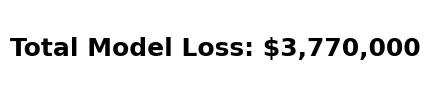

In [90]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

plt.figure(figsize=(3, 1))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=18, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()



In [61]:
#Loss = $4,932,000

## F1 Logistical

In [62]:
#Performing grid search for best precision model

#Set parameter grid
log_param_grid = {'classifier__C': [0.01, 0.1, 1, 10],
                  'classifier__penalty': ['l1', 'l2'],
                  'classifier__solver': ['liblinear', 'saga']
}

#perform grid search using percision
log_grid_search_f1 = GridSearchCV(lr_pipeline, log_param_grid, cv=5, scoring='f1', n_jobs=-1)

#Fit the model
log_grid_search_f1.fit(X_fl_train, y_fl_train)

#Print results
print("Best parameters:", log_grid_search_f1.best_params_)
print("Best precision:", log_grid_search_f1.best_score_)

Best parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best precision: 0.9269691893370468


In [63]:
#Get best model
best_lr_model_f1 = log_grid_search_f1.best_estimator_

#Fit best model
best_lr_model_f1.fit(X_fl_train, y_fl_train)

#Calculate prediction
best_y_pred_lr_f1 = best_lr_model_f1.predict(X_fl_test)
best_y_proba_lr_f1 = best_lr_model_f1.predict_proba(X_fl_test)[:, 1]

#Calculate estimators
accuracy_lr_f1 = accuracy_score(y_fl_test, best_y_pred_lr_f1)
precision_lr_f1 = precision_score(y_fl_test, best_y_pred_lr_f1)
recall_lr_f1 = recall_score(y_fl_test, best_y_pred_lr_f1)
f1_lr_f1 = f1_score(y_fl_test, best_y_pred_lr_f1)

#Print estimator values
accuracy_lr_f1, precision_lr_f1, recall_lr_f1, f1_lr_f1

(0.96275, 0.9375, 0.9144542772861357, 0.9258337481333997)

In [64]:
f1_cm = confusion_matrix(y_fl_test, best_y_pred_lr_f1)
tn, fp, fn, tp = confusion_matrix(y_fl_test, best_y_pred_lr_f1).ravel()
f1_cm

array([[2921,   62],
       [  87,  930]])

Total Loss in Model: $3796000


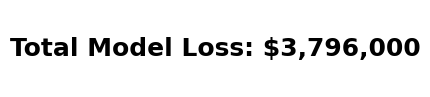

In [65]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

plt.figure(figsize=(3, 1))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=18, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()


## Accuracy Logistical

In [66]:
#Performing grid search for best precision model

#Set parameter grid
log_param_grid = {'classifier__C': [0.01, 0.1, 1, 10],
                  'classifier__penalty': ['l1', 'l2'],
                  'classifier__solver': ['liblinear', 'saga']
}

#perform grid search using percision
log_grid_search_acc = GridSearchCV(lr_pipeline, log_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#Fit the model
log_grid_search_acc.fit(X_fl_train, y_fl_train)

#Print results
print("Best parameters:", log_grid_search_acc.best_params_)
print("Best precision:", log_grid_search_acc.best_score_)

Best parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best precision: 0.9657499999999999


In [67]:
#Get best model
best_lr_model_acc = log_grid_search_acc.best_estimator_

#Fit best model
best_lr_model_acc.fit(X_fl_train, y_fl_train)

#Calculate prediction
best_y_pred_lr_acc = best_lr_model_acc.predict(X_fl_test)
best_y_proba_lr_acc = best_lr_model_acc.predict_proba(X_fl_test)[:, 1]

#Calculate estimators
accuracy_lr_acc = accuracy_score(y_fl_test, best_y_pred_lr_acc)
precision_lr_acc = precision_score(y_fl_test, best_y_pred_lr_acc)
recall_lr_acc = recall_score(y_fl_test, best_y_pred_lr_acc)
f1_lr_acc = f1_score(y_fl_test, best_y_pred_lr_acc)

#Print estimator values
accuracy_lr_acc, precision_lr_acc, recall_lr_acc, f1_lr_acc

(0.96275, 0.9375, 0.9144542772861357, 0.9258337481333997)

In [68]:
acc_cm = confusion_matrix(y_fl_test, best_y_pred_lr_acc)
tn, fp, fn, tp = confusion_matrix(y_fl_test, best_y_pred_lr_acc).ravel()
acc_cm

array([[2921,   62],
       [  87,  930]])

Total Loss in Model: $3796000


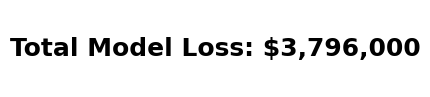

In [69]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

plt.figure(figsize=(3, 1))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=18, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()


## SVM

In [70]:
#SVM pipeline
svm_pipeline = Pipeline([
    ("preprocessor", preprocessor_fl),  # Keep preprocessing steps
    ("classifier", SVC(probability=True, random_state=42))  # Enable probability output for ROC-AUC evaluation
])

#Fit model
svm_pipeline.fit(X_fl_train, y_fl_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'CreditScore', 'Experience',
                                                   'LoanAmount', 'LoanDuration',
                                                   'NumberOfDependents',
                                                   'MonthlyDebtPayments',
                                                   'CreditCardUtilizationRate',
                                                   'NumberOfOpenCreditLines',
                                                   'NumberOfCredi...
                                                  ['EmploymentStatus',
                                                   'MaritalStatus',
                                                   'HomeOwnershipStatus',
                                                   'BankruptcyHistory',
                                                   'LoanPurpose']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['High '
                                                                                               'School',
                                                                                               'Associate',
                                                                                               'Bachelor',
                                                                                               'Master',
                                                                                               'Doctorate']]))]),
                                                  ['EducationLevel'])])),
                ('classifier', SVC(probability=True, random_state=42))])

In [71]:
#Predictions on test data
y_pred_svm = svm_pipeline.predict(X_fl_test)
y_pred_proba_svm = svm_pipeline.predict_proba(X_fl_test)[:, 1]

In [72]:
#Calculate metrics
accuracy_svm = accuracy_score(y_fl_test, y_pred_svm)
precision_svm = precision_score(y_fl_test, y_pred_svm)
recall_svm = recall_score(y_fl_test, y_pred_svm)
f1_svm = f1_score(y_fl_test, y_pred_svm)

#View metrics
accuracy_svm, precision_svm, recall_svm, f1_svm

(0.9585, 0.9400206825232679, 0.8938053097345132, 0.9163306451612903)

In [73]:
# Confusion Matrix
svm_cm = confusion_matrix(y_fl_test, y_pred_svm)
tn, fp, fn, tp = confusion_matrix(y_fl_test, y_pred_svm).ravel()
svm_cm

array([[2925,   58],
       [ 108,  909]])

Total Loss in Model: $3764000


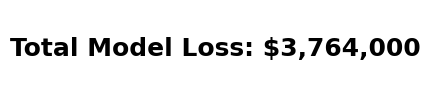

In [74]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

plt.figure(figsize=(3, 1))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=18, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()


0.9933838457255816


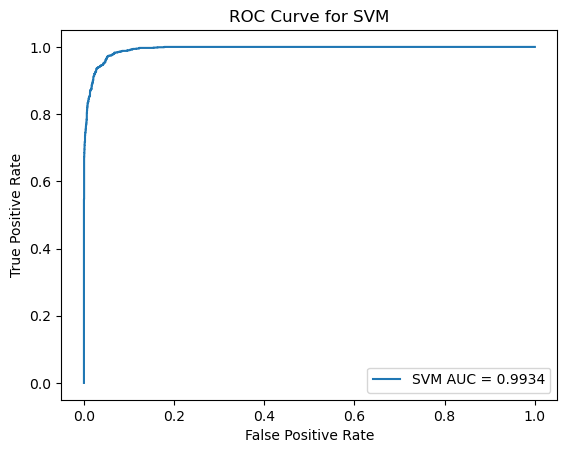

In [75]:
# AUC score and ROC curve
auc_svm = roc_auc_score(y_fl_test, y_pred_proba_svm)
print(auc_svm)

fpr, tpr, threshold = roc_curve(y_fl_test, y_pred_proba_svm)
plt.plot(fpr, tpr, label=f"SVM AUC = {auc_svm:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend()
plt.show()


In [76]:
svm_params = svm_pipeline.get_params()

svm_params['classifier'].get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Precision SVM

In [77]:
#Set Grid search parameters
param_grid_svm = {
    'classifier__C': [0.01, 0.1, 1, 10],  # Regularization strength
    'classifier__kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'classifier__gamma': ['scale', 'auto']  # Kernel coefficient (for RBF/poly)
}

#Execute grid search
grid_search_svm_prec = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring='precision', n_jobs=-1)

#Fit training data to results
grid_search_svm_prec.fit(X_fl_train, y_fl_train)

# Get best hyperparameters
print("Best parameters for SVM:", grid_search_svm_prec.best_params_)
print("Best precision for SVM:", grid_search_svm_prec.best_score_)


Best parameters for SVM: {'classifier__C': 0.01, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best precision for SVM: 0.9839699281801725


In [79]:
#get the best model
best_svm_prec = grid_search_svm_prec.best_estimator_

#Fit training data to best model
best_svm_prec.fit(X_fl_train, y_fl_train)

#make predictions
best_y_pred_svm_prec = best_svm_prec.predict(X_fl_test)
best_y_proba_svm_prec = best_svm_prec.predict_proba(X_fl_test)[:, 1]

#Calculate estimators
accuracy_svm_prec = accuracy_score(y_fl_test, best_y_pred_svm_prec)
precision_svm_prec = precision_score(y_fl_test, best_y_pred_svm_prec)
recall_svm_prec = recall_score(y_fl_test, best_y_pred_svm_prec)
f1_svm_prec = f1_score(y_fl_test, best_y_pred_svm_prec)

#View estimators
accuracy_svm_prec, precision_svm_prec, recall_svm_prec, f1_svm_prec

(0.8465, 0.9855421686746988, 0.40216322517207476, 0.5712290502793296)

In [80]:
#Confusion matrix
best_cm = confusion_matrix(y_fl_test, best_y_pred_svm_prec)
tn, fp, fn, tp = confusion_matrix(y_fl_test, best_y_pred_svm_prec).ravel()
best_cm

array([[2977,    6],
       [ 608,  409]])

Total Loss in Model: $5164000


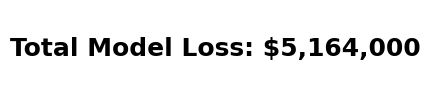

In [81]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

plt.figure(figsize=(3, 1))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=18, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()



In [82]:
# Loss = $5,658,000

## F1 Score SVM

In [84]:
#Grid search for scoring on f1 score
grid_search_svm2 = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)

#Fit the results
grid_search_svm2.fit(X_fl_train, y_fl_train)

# Get best hyperparameters
print("Best parameters for SVM:", grid_search_svm2.best_params_)
print("Best precision for SVM:", grid_search_svm2.best_score_)

Best parameters for SVM: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best precision for SVM: 0.9262212532783133


In [85]:
#choose best f1 model
best_f1_svm = grid_search_svm2.best_estimator_

#Fit the model
best_f1_svm.fit(X_fl_train, y_fl_train)

#Make predictions
best_y_pred_svm_f1 = best_f1_svm.predict(X_fl_test)
best_y_proba_svm_f1 = best_f1_svm.predict_proba(X_fl_test)[:, 1]

#Calculate estimators
accuracy_svm_f1 = accuracy_score(y_fl_test, best_y_pred_svm_f1)
precision_svm_f1 = precision_score(y_fl_test, best_y_pred_svm_f1)
recall_svm_f1 = recall_score(y_fl_test, best_y_pred_svm_f1)
f1_svm_f1 = f1_score(y_fl_test, best_y_pred_svm_f1)

#View estimators
accuracy_svm_f1, precision_svm_f1, recall_svm_f1, f1_svm_f1

(0.96225, 0.936491935483871, 0.9134709931170109, 0.9248382279741165)

In [86]:
#Confusion matrix
f1_cm = confusion_matrix(y_fl_test, best_y_pred_svm_f1)
tn, fp, fn, tp = confusion_matrix(y_fl_test, best_y_pred_svm_f1).ravel()
f1_cm

array([[2920,   63],
       [  88,  929]])

Total Loss in Model: $3854000


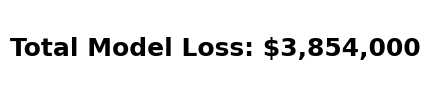

In [87]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

plt.figure(figsize=(3, 1))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=18, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()


In [88]:
#Loss = $3,854,000

## Accuracy SVM

In [90]:
#Grid search with scoring on accuracy
grid_search_svm3 = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

#Fit results
grid_search_svm3.fit(X_fl_train, y_fl_train)

# Get best hyperparameters
print("Best parameters for SVM:", grid_search_svm3.best_params_)
print("Best precision for SVM:", grid_search_svm3.best_score_)

Best parameters for SVM: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best precision for SVM: 0.9654375


In [91]:
#choose best accuracy model
best_acc_svm = grid_search_svm2.best_estimator_

#Fit the model
best_acc_svm.fit(X_fl_train, y_fl_train)

#make predictions
best_y_pred_svm_acc = best_acc_svm.predict(X_fl_test)
best_y_proba_svm_acc = best_acc_svm.predict_proba(X_fl_test)[:, 1]

# calculate estimators
accuracy_svm_acc = accuracy_score(y_fl_test, best_y_pred_svm_acc)
precision_svm_acc = precision_score(y_fl_test, best_y_pred_svm_acc)
recall_svm_acc = recall_score(y_fl_test, best_y_pred_svm_acc)
f1_svm_acc = f1_score(y_fl_test, best_y_pred_svm_acc)

#view evaluators
accuracy_svm_acc, precision_svm_acc, recall_svm_acc, f1_svm_acc

(0.96225, 0.936491935483871, 0.9134709931170109, 0.9248382279741165)

In [92]:
#confusion matrix
acc_cm = confusion_matrix(y_fl_test, best_y_pred_svm_acc)
tn, fp, fn, tp = confusion_matrix(y_fl_test, best_y_pred_svm_acc).ravel()
acc_cm

array([[2920,   63],
       [  88,  929]])

Total Loss in Model: $3854000


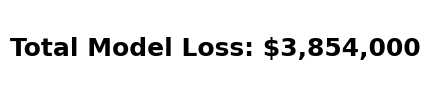

In [93]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

plt.figure(figsize=(3, 1))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=18, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()


In [94]:
# Loss = $3,854,000

## Custom SVM - 80% Precision, 20% Recall

In [96]:
#created a custom scoring technique which calculates 90% precision and 10% recall
def balanced_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 0.8 * precision + 0.2 * recall

custom_scorer = make_scorer(balanced_score)

#Grid search using custom scorer
grid_search_svm3 = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring=custom_scorer, n_jobs=-1)

#Train the model
grid_search_svm3.fit(X_fl_train, y_fl_train)

# Get best hyperparameters
print("Best parameters for SVM:", grid_search_svm3.best_params_)
print("Best precision for SVM:", grid_search_svm3.best_score_)

Best parameters for SVM: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best precision for SVM: 0.9285909180687651


In [130]:
#Choose the best model from the grid search
best_cust_svm = grid_search_svm3.best_estimator_

#Fit the best model
best_cust_svm.fit(X_fl_train, y_fl_train)

# Make predictions on the model
best_y_pred_svm_cust = best_cust_svm.predict(X_fl_test)
best_y_proba_svm_cust = best_cust_svm.predict_proba(X_fl_test)[:, 1]

#Calculate evaluation metrics
accuracy_svm_cust = accuracy_score(y_fl_test, best_y_pred_svm_cust)
precision_svm_cust = precision_score(y_fl_test, best_y_pred_svm_cust)
recall_svm_cust = recall_score(y_fl_test, best_y_pred_svm_cust)
f1_svm_cust = f1_score(y_fl_test, best_y_pred_svm_cust)

# View evaluation metrics
accuracy_svm_cust, precision_svm_cust, recall_svm_cust, f1_svm_cust

(0.96225, 0.936491935483871, 0.9134709931170109, 0.9248382279741165)

In [131]:
# Confusion matrix
cust_cm = confusion_matrix(y_fl_test, best_y_pred_svm_cust)
tn, fp, fn, tp = confusion_matrix(y_fl_test, best_y_pred_svm_cust).ravel()
cust_cm

array([[2920,   63],
       [  88,  929]])

Total Loss in Model: $3854000


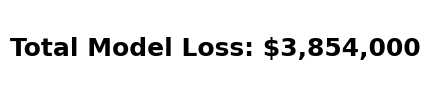

In [132]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

plt.figure(figsize=(3, 1))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=18, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()


In [100]:
# Loss = #3,854,000

In [133]:
svm_cv_scores = cross_val_score(best_cust_svm, X_fl, y_fl, cv=5, scoring=custom_scorer)

svm_cv_scores.mean()

0.9272490830937083

## Random Forest

In [102]:
# Random Forest Classifier pipeline
fl_rf_pipeline = Pipeline([
    ("preprocessor", preprocessor_fl),  # Keep preprocessing steps
    ("classifier", RandomForestClassifier(random_state=42))
])

# Fit the training data to the pipeline
fl_rf_pipeline.fit(X_fl_train, y_fl_train)

# Predict loan approval on test data
y_pred_rf = fl_rf_pipeline.predict(X_fl_test)
y_pred_proba_rf = fl_rf_pipeline.predict_proba(X_fl_test)[:, 1]

In [103]:
# Calculate evaluation metric
accuracy_rf = accuracy_score(y_fl_test, y_pred_rf)
precision_rf = precision_score(y_fl_test, y_pred_rf)
recall_rf = recall_score(y_fl_test, y_pred_rf)
f1_rf = f1_score(y_fl_test, y_pred_rf)

# View the evaluation metrics
accuracy_rf, precision_rf, recall_rf, f1_rf

(0.92775, 0.9017660044150111, 0.8033431661750245, 0.8497139885595423)

In [104]:
# Correlation matrix
rf_cm = confusion_matrix(y_fl_test, y_pred_rf)
rf_cm

array([[2894,   89],
       [ 200,  817]])

0.9791990733461428


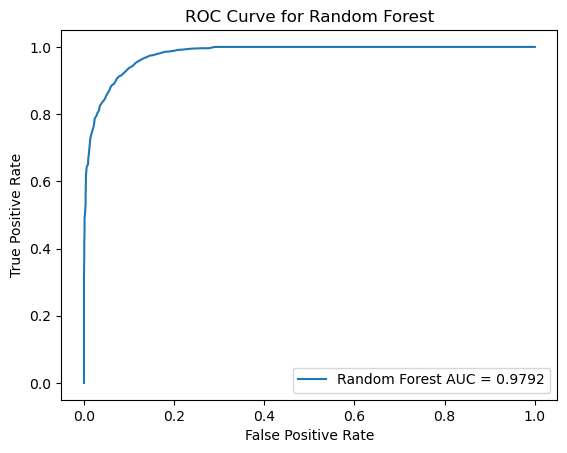

In [105]:
# AOC ROC curve
auc_rf = roc_auc_score(y_fl_test, y_pred_proba_rf)
print(auc_rf)

fpr, tpr, threshold = roc_curve(y_fl_test, y_pred_proba_rf)
plt.plot(fpr, tpr, label=f"Random Forest AUC = {auc_rf:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.show()


In [108]:
# Parameters for grid search
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20],  # Maximum depth of trees
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples needed for a split
    'classifier__min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'classifier__bootstrap': [True, False]  # Use bootstrap sampling or not
}

# Execute grid search for scoring on precision
grid_search_rf = GridSearchCV(fl_rf_pipeline, param_grid_rf, cv=5, scoring='precision', n_jobs=-1)

# Fit the training data to the model
grid_search_rf.fit(X_fl_train, y_fl_train)

# Get best hyperparameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best precision for Random Forest:", grid_search_rf.best_score_)


Best parameters for Random Forest: {'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best precision for Random Forest: 0.8945608998259438


In [134]:
# Get the best model
best_prec_rf = grid_search_rf.best_estimator_

# Train the model
best_prec_rf.fit(X_fl_train, y_fl_train)

# Make prediction
best_y_pred_prec_rf = best_prec_rf.predict(X_fl_test)
best_y_proba_prec_rf = best_prec_rf.predict_proba(X_fl_test)[:, 1]

# Caluclate metrics
accuracy_rf_prec = accuracy_score(y_fl_test, best_y_pred_prec_rf)
precision_rf_prec = precision_score(y_fl_test, best_y_pred_prec_rf)
recall_rf_prec = recall_score(y_fl_test, best_y_pred_prec_rf)
f1_rf_prec = f1_score(y_fl_test, best_y_pred_prec_rf)

# View metrics
accuracy_rf_prec, precision_rf_prec, recall_rf_prec, f1_rf_prec

(0.9275, 0.8981380065717415, 0.8062930186823992, 0.8497409326424872)

In [135]:
# Confusion matrix
rf_prec_cm = confusion_matrix(y_fl_test, best_y_pred_prec_rf)
rf_prec_cm

array([[2890,   93],
       [ 197,  820]])

In [136]:
auc_rf_prec = roc_auc_score(y_fl_test, best_y_proba_prec_rf)
print(auc_rf_prec)

0.9794593156698183


## Custom 80/20 RF

In [113]:
# Execute grid search for scoring on precision
grid_search_rf_cust = GridSearchCV(fl_rf_pipeline, param_grid_rf, cv=5, scoring=custom_scorer, n_jobs=-1)

# Fit the training data to the model
grid_search_rf_cust.fit(X_fl_train, y_fl_train)

# Get best hyperparameters
print("Best parameters for Random Forest:", grid_search_rf_cust.best_params_)
print("Best precision for Random Forest:", grid_search_rf_cust.best_score_)

Best parameters for Random Forest: {'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best precision for Random Forest: 0.8743507910087871


In [137]:
# Get the best model
best_cust_rf_ = grid_search_rf_cust.best_estimator_

# Train the model
best_cust_rf_.fit(X_fl_train, y_fl_train)

# Make prediction
best_y_pred_cust_rf = best_cust_rf_.predict(X_fl_test)
best_y_proba_cust_rf = best_cust_rf_.predict_proba(X_fl_test)[:, 1]

# Caluclate metrics
accuracy_rf_cust = accuracy_score(y_fl_test, best_y_pred_cust_rf)
precision_rf_cust = precision_score(y_fl_test, best_y_pred_cust_rf)
recall_rf_cust = recall_score(y_fl_test, best_y_pred_cust_rf)
f1_rf_cust = f1_score(y_fl_test, best_y_pred_cust_rf)

# View metrics
accuracy_rf_cust, precision_rf_cust, recall_rf_cust, f1_rf_cust

(0.9275, 0.8981380065717415, 0.8062930186823992, 0.8497409326424872)

In [138]:
rf_cust_cm = confusion_matrix(y_fl_test, best_y_pred_cust_rf)
rf_cust_cm

array([[2890,   93],
       [ 197,  820]])

In [139]:
auc_rf_cust = roc_auc_score(y_fl_test, best_y_proba_cust_rf)
print(auc_rf_cust)

0.9794593156698183


## Random Forest not as good as SVM or Logistic

## XGBoost

In [54]:
xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor_fl),  # Keep preprocessing steps
    ("classifier", XGBClassifier(random_state=42))
])

xgb_pipeline.fit(X_fl_train, y_fl_train)

y_pred_xgb = xgb_pipeline.predict(X_fl_test)
y_pred_proba_xgb = xgb_pipeline.predict_proba(X_fl_test)[:, 1]

In [57]:
# Calculate evaluation metric
accuracy_xgb = accuracy_score(y_fl_test, y_pred_xgb)
precision_xgb = precision_score(y_fl_test, y_pred_xgb)
recall_xgb = recall_score(y_fl_test, y_pred_xgb)
f1_xgb = f1_score(y_fl_test, y_pred_xgb)

# View the evaluation metrics
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb

(0.9535, 0.9244126659856997, 0.8898721730580138, 0.9068136272545092)

In [58]:
auc_xgb = roc_auc_score(y_fl_test, y_pred_proba_xgb)
print(auc_xgb)

0.990470746883932


In [59]:
# Cross validation scores
xgb_cv_scores = cross_val_score(xgb_pipeline, X_fl, y_fl, cv=5, scoring="accuracy")

xgb_cv_scores.mean()

0.95505

In [60]:
xgb_param_grid = {
    "classifier__n_estimators": [100, 200, 300],  
    "classifier__max_depth": [3, 5, 7],            
    "classifier__learning_rate": [0.01, 0.1, 0.3], 
    "classifier__subsample": [0.8, 1.0],          
    "classifier__colsample_bytree": [0.8, 1.0]    
}



## Custom scoring 80/20 precision/recall XGB

In [63]:
# Customer 80% Precision, 20% Recall Score
xgb_grid_search = GridSearchCV(xgb_pipeline, param_grid=xgb_param_grid, cv=5, scoring=custom_scorer, n_jobs=-1)

xgb_grid_search.fit(X_fl_train, y_fl_train)


print("Best Parameters:", xgb_grid_search.best_params_)
print("Best Score:", xgb_grid_search.best_score_)

Best Parameters: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}
Best Score: 0.919193428386959


In [64]:
best_xgb_model = xgb_grid_search.best_estimator_

# Train the model
best_xgb_model.fit(X_fl_train, y_fl_train)

# Make prediction
best_y_pred_xgb = best_xgb_model.predict(X_fl_test)
best_y_proba_xgb = best_xgb_model.predict_proba(X_fl_test)[:, 1]

# Caluclate metrics
accuracy_xgbc_cust = accuracy_score(y_fl_test, best_y_pred_xgb)
precision_xgb_cust = precision_score(y_fl_test, best_y_pred_xgb)
recall_xgb_cust = recall_score(y_fl_test, best_y_pred_xgb)
f1_xgb_cust = f1_score(y_fl_test, best_y_pred_xgb)

# View metrics
accuracy_xgbc_cust, precision_xgb_cust, recall_xgb_cust, f1_xgb_cust

(0.9575, 0.9299492385786802, 0.9006882989183874, 0.9150849150849151)

In [65]:
auc_xgb_cust = roc_auc_score(y_fl_test, best_y_proba_xgb)
print(auc_xgb_cust)

0.9928954999339092


In [66]:
# Confusion matrix
xgb_cm = confusion_matrix(y_fl_test, best_y_pred_xgb)
tn, fp, fn, tp = confusion_matrix(y_fl_test, best_y_pred_xgb).ravel()
xgb_cm

array([[2914,   69],
       [ 101,  916]])

Total Loss in Model: $4258000


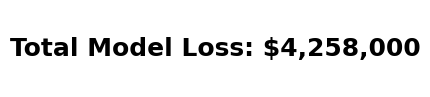

In [67]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

plt.figure(figsize=(3, 1))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=18, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()


## Precision XGB

In [68]:
#Precision Score
xgb_grid_search_prec = GridSearchCV(xgb_pipeline, param_grid=xgb_param_grid, cv=5, scoring='precision', n_jobs=-1)

xgb_grid_search_prec.fit(X_fl_train, y_fl_train)


print("Best Parameters:", xgb_grid_search_prec.best_params_)
print("Best Score:", xgb_grid_search_prec.best_score_)

Best Parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 7, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Best Score: 0.9488463930034984


In [69]:
best_xgb_model_prec = xgb_grid_search_prec.best_estimator_

# Train the model
best_xgb_model_prec.fit(X_fl_train, y_fl_train)

# Make prediction
best_y_pred_xgb_prec = best_xgb_model_prec.predict(X_fl_test)
best_y_proba_xgb_prec = best_xgb_model_prec.predict_proba(X_fl_test)[:, 1]

# Caluclate metrics
accuracy_xgb_prec = accuracy_score(y_fl_test, best_y_pred_xgb_prec)
precision_xgb_prec = precision_score(y_fl_test, best_y_pred_xgb_prec)
recall_xgb_prec = recall_score(y_fl_test, best_y_pred_xgb_prec)
f1_xgb_prec = f1_score(y_fl_test, best_y_pred_xgb_prec)

# View metrics
accuracy_xgb_prec, precision_xgb_prec, recall_xgb_prec, f1_xgb_prec

(0.90875, 0.9515235457063712, 0.6755162241887905, 0.7901092581943646)

In [80]:
auc_xgb_prec = roc_auc_score(y_fl_test, best_y_proba_xgb_prec)
print(auc_xgb_prec)

0.9776639897472106


In [70]:
# Confusion matrix
xgb_cm_prec = confusion_matrix(y_fl_test, best_y_pred_xgb_prec)
tn, fp, fn, tp = confusion_matrix(y_fl_test, best_y_pred_xgb_prec).ravel()
xgb_cm_prec

array([[2948,   35],
       [ 330,  687]])

Total Loss in Model: $4390000


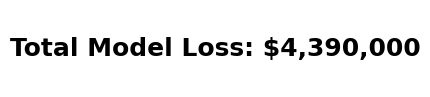

In [71]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

plt.figure(figsize=(3, 1))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=18, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()


## Accuracy XGB

In [72]:
#Accuracy score
xgb_grid_search_acc = GridSearchCV(xgb_pipeline, param_grid=xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

xgb_grid_search_acc.fit(X_fl_train, y_fl_train)


print("Best Parameters:", xgb_grid_search_acc.best_params_)
print("Best Score:", xgb_grid_search_acc.best_score_)

Best Parameters: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}
Best Score: 0.95875


In [73]:
best_xgb_model_acc = xgb_grid_search_acc.best_estimator_

# Train the model
best_xgb_model_acc.fit(X_fl_train, y_fl_train)

# Make prediction
best_y_pred_xgb_acc = best_xgb_model_acc.predict(X_fl_test)
best_y_proba_xgb_acc = best_xgb_model_acc.predict_proba(X_fl_test)[:, 1]

# Caluclate metrics
accuracy_xgb_acc = accuracy_score(y_fl_test, best_y_pred_xgb_acc)
precision_xgb_acc = precision_score(y_fl_test, best_y_pred_xgb_acc)
recall_xgb_acc = recall_score(y_fl_test, best_y_pred_xgb_acc)
f1_xgb_acc = f1_score(y_fl_test, best_y_pred_xgb_acc)

# View metrics
accuracy_xgb_acc, precision_xgb_acc, recall_xgb_acc, f1_xgb_acc

(0.9575, 0.9299492385786802, 0.9006882989183874, 0.9150849150849151)

In [74]:
# Confusion matrix
xgb_cm_acc = confusion_matrix(y_fl_test, best_y_pred_xgb_acc)
tn, fp, fn, tp = confusion_matrix(y_fl_test, best_y_pred_xgb_acc).ravel()
xgb_cm_acc

array([[2914,   69],
       [ 101,  916]])

Total Loss in Model: $4258000


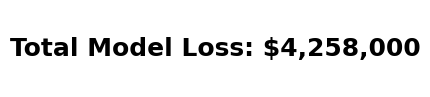

In [75]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

plt.figure(figsize=(3, 1))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=18, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()



## F1 XGB

In [76]:
#F1 Score
xgb_grid_search_f1 = GridSearchCV(xgb_pipeline, param_grid=xgb_param_grid, cv=5, scoring='f1', n_jobs=-1)

xgb_grid_search_f1.fit(X_fl_train, y_fl_train)


print("Best Parameters:", xgb_grid_search_f1.best_params_)
print("Best Score:", xgb_grid_search_f1.best_score_)

Best Parameters: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}
Best Score: 0.9110729828321938


In [77]:
best_xgb_model_f1 = xgb_grid_search_f1.best_estimator_

# Train the model
best_xgb_model_f1.fit(X_fl_train, y_fl_train)

# Make prediction
best_y_pred_xgb_f1 = best_xgb_model_f1.predict(X_fl_test)
best_y_proba_xgb_f1 = best_xgb_model_f1.predict_proba(X_fl_test)[:, 1]

# Caluclate metrics
accuracy_xgb_f1 = accuracy_score(y_fl_test, best_y_pred_xgb_f1)
precision_xgb_f1 = precision_score(y_fl_test, best_y_pred_xgb_f1)
recall_xgb_f1 = recall_score(y_fl_test, best_y_pred_xgb_f1)
f1_xgb_f1 = f1_score(y_fl_test, best_y_pred_xgb_f1)

# View metrics
accuracy_xgb_f1, precision_xgb_f1, recall_xgb_f1, f1_xgb_f1

(0.9575, 0.9299492385786802, 0.9006882989183874, 0.9150849150849151)

In [78]:
# Confusion matrix
xgb_cm_f1 = confusion_matrix(y_fl_test, best_y_pred_xgb_acc)
tn, fp, fn, tp = confusion_matrix(y_fl_test, best_y_pred_xgb_f1).ravel()
xgb_cm_f1

array([[2914,   69],
       [ 101,  916]])

Total Loss in Model: $4258000


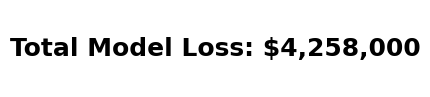

In [79]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

plt.figure(figsize=(3, 1))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=18, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()


## XGBoost not as good as Logistic or Support Vector

## Evaluation and Conclusion
8. Conduct thorough evaluation of final model:
- Assess models test data performance using your defined metrics
- Analyze performance across different data segments
- Identify potential biases or limitations
- Visualize model performance
    - Classification: Confusion Matrix/ROC-AUC
    - Regression: Scatter Plot (Predicted vs. Actual values)

9. Extract and interpret feature importance/significance:
- Which features had the most impact on your model?
- Does this lead to any potential business recommendations?

10. Prepare your final deliverable:
- Technical notebook with complete analysis
- Executive summary for business stakeholders
- Recommendations for implementation
- Documentation of potential improvements

In [94]:
#Get original pipeline model
final_model_log = best_cust_lr

#Fit the model to training data
final_model_log.fit(X_fl_train, y_fl_train)

# Make predictions on final model
final_y_pred_log = final_model_log.predict(X_fl_test)
final_y_proba_log = final_model_log.predict_proba(X_fl_test)[:,1]

# Calculate accuracy, precision, recall, f1 score
accuracy_final_log = accuracy_score(y_fl_test, final_y_pred_log)
precision_final_log = precision_score(y_fl_test, final_y_pred_log)
recall_final_log = recall_score(y_fl_test, final_y_pred_log)
f1_final_log = f1_score(y_fl_test, final_y_pred_log)
custom_final_log = balanced_score(y_fl_test, final_y_pred_log)

# View evaluation metrics
print(accuracy_final_log, precision_final_log, recall_final_log, f1_final_log, custom_final_log)

0.96225 0.9382591093117408 0.911504424778761 0.9246882793017456 0.932908172405145


In [95]:
#Cross validation scores for custom scorer
final_cv_scores = cross_val_score(final_model_log, X_fl, y_fl, cv=5, scoring=custom_scorer)
print(final_cv_scores)
print(final_cv_scores.mean())

[0.93001487 0.92505452 0.92369695 0.9388818  0.92882263]
0.9292941549282034


In [96]:
final_cv_scores_acc = cross_val_score(final_model_log, X_fl, y_fl, cv=5, scoring='accuracy')

print(final_cv_scores_acc)
print(final_cv_scores_acc.mean())

[0.968   0.96525 0.95925 0.9685  0.965  ]
0.9652000000000001


In [97]:
final_cv_scores_prec = cross_val_score(final_model_log, X_fl, y_fl, cv=5, scoring='precision')

print(final_cv_scores_prec)
print(final_cv_scores_prec.mean())

[0.92768595 0.92331606 0.93051031 0.9424307  0.93037975]
0.9308645555849402


In [98]:
#Correlation matrix
final_cm_log = confusion_matrix(y_fl_test, final_y_pred_log)
tn, fp, fn, tp = confusion_matrix(y_fl_test, final_y_pred_log).ravel()
print(final_cm_log)

[[2922   61]
 [  90  927]]


Total Loss in Model: $3770000


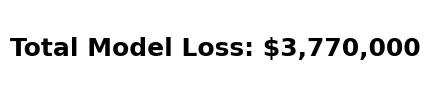

In [99]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

plt.figure(figsize=(3, 1))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=18, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()


In [100]:
# Classification Report
final_cr_log = classification_report(y_fl_test, final_y_pred_log)
final_cr_log

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.97      2983\n           1       0.94      0.91      0.92      1017\n\n    accuracy                           0.96      4000\n   macro avg       0.95      0.95      0.95      4000\nweighted avg       0.96      0.96      0.96      4000\n'


===== Final Model Evaluation =====

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2983
           1       0.94      0.91      0.92      1017

    accuracy                           0.96      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.96      0.96      0.96      4000

Confusion Matrix:


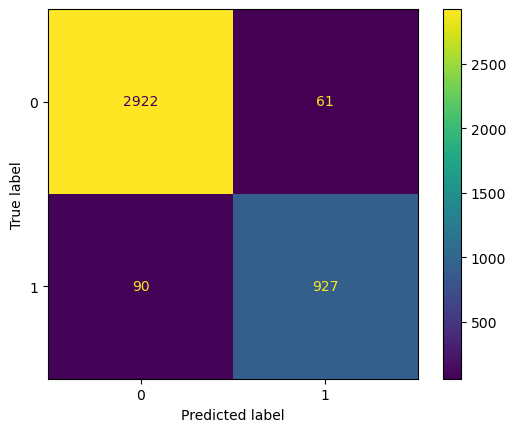

In [101]:
# Display classification report and correlation matrix in a nice manner
print(f"\n===== Final Model Evaluation =====")
print("\nClassification Report:")
print(final_cr_log)
print(f"Confusion Matrix:")
ConfusionMatrixDisplay(final_cm_log).plot();

In [102]:
#Get coefficient values and names

#Get classifier model
log_final_model_m = final_model_log["classifier"]

#Extract feature values and names
log_feature_importance = np.abs(log_final_model_m.coef_[0])
log_feature_names = final_model_log["preprocessor"].get_feature_names_out()

#Put into DataFrame and Sort
log_final_feature_df = pd.DataFrame({'Feature_Name': log_feature_names, 'Feature_Importance': log_feature_importance})
log_final_feature_df = log_final_feature_df.sort_values(by='Feature_Importance', ascending=False)

#View dataframe
log_final_feature_df

,Feature_Name,Feature_Importance
26,num__TotalDebtToIncomeRatio,7.391882
24,num__InterestRate,5.152458
19,num__MonthlyIncome,4.585113
39,cat__BankruptcyHistory_Yes,3.983725
22,num__NetWorth,2.533185
29,cat__EmploymentStatus_Unemployed,2.520760
38,cat__BankruptcyHistory_No,2.159551
4,num__LoanAmount,2.125243
2,num__CreditScore,2.046873
14,num__LengthOfCreditHistory,1.650718


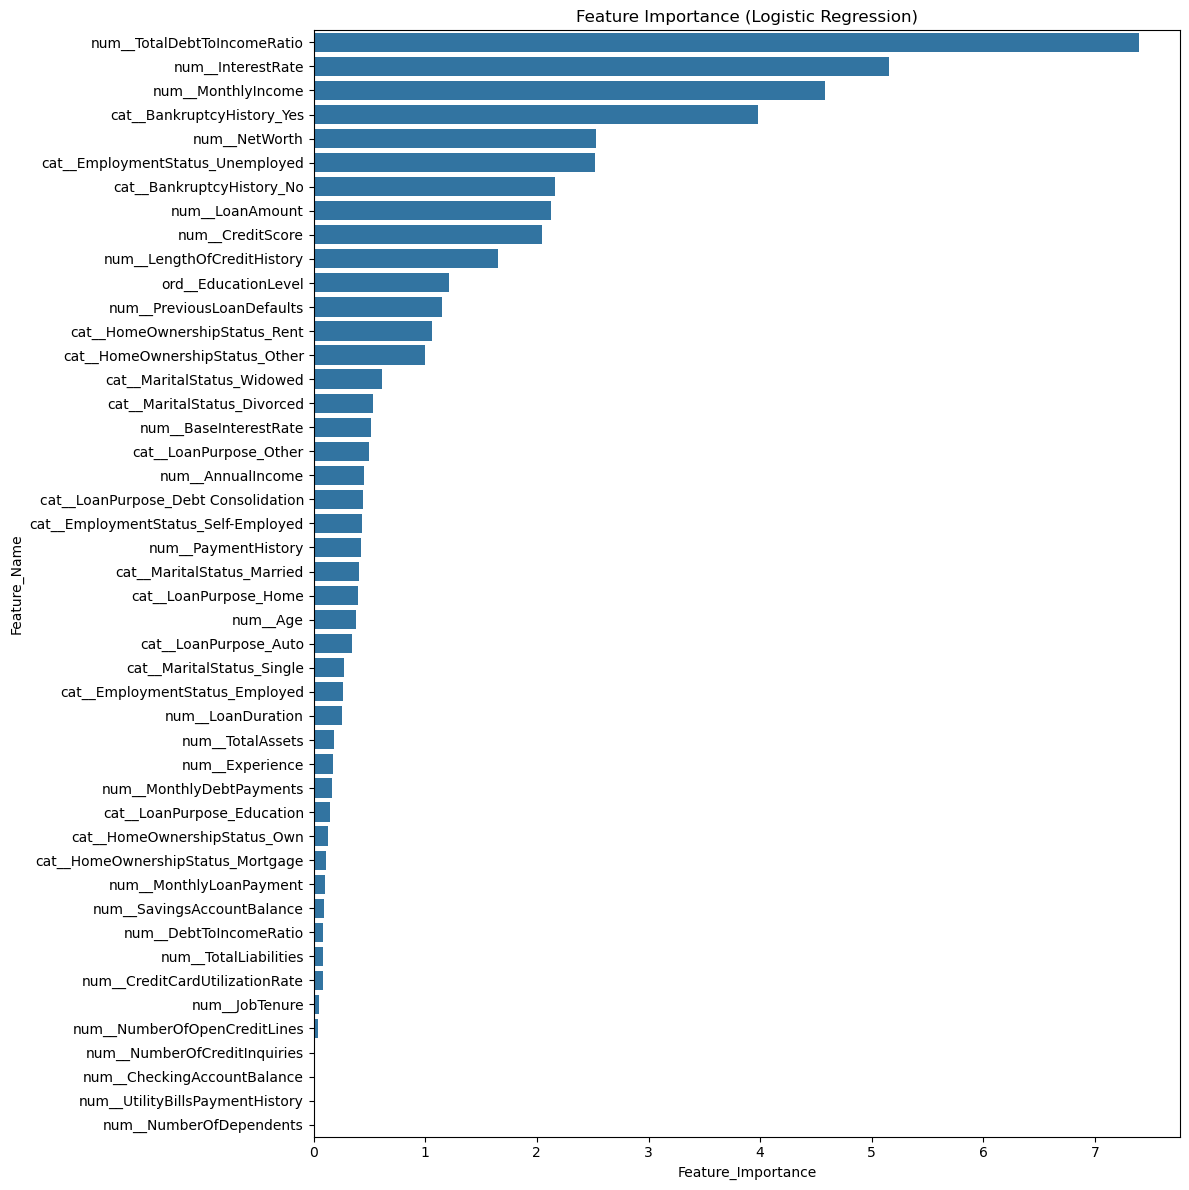

In [103]:
# Bar chart to display level of importance per feature.  Since Logistic, used Coefficients
plt.figure(figsize=(12, 12))
sns.barplot(data=log_final_feature_df, x='Feature_Importance', y='Feature_Name')
plt.title('Feature Importance (Logistic Regression)')
plt.tight_layout()
plt.show()

0.9950347940196017


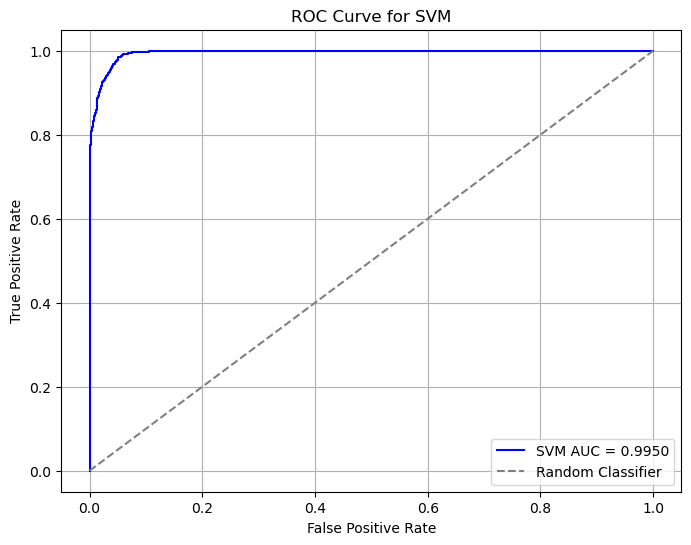

In [105]:
# Calculate and display the AOC score and ROC curve
auc_log = roc_auc_score(y_fl_test, final_y_proba_log)
print(auc_log)

fpr, tpr, threshold = roc_curve(y_fl_test, final_y_proba_log)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SVM AUC = {auc_log:.4f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend()
plt.grid()
plt.show()


## Ignore below.  This was the best SVM model which is not the final model.  Final model is above, logistical regression.

In [ ]:
# Best model was the SVM with the custom scoring metric.  It had the least amount of money lost in the test data, so we will  choose that model for now even though it did have higher recall than preferred.
final_model_svm = best_cust_svm
final_model_svm.fit(X_fl_train, y_fl_train)

# Make predictions on final model
final_y_pred_svm = final_model_svm.predict(X_fl_test)
final_y_proba_svm = final_model_svm.predict_proba(X_fl_test)[:,1]

# Calculate accuracy, precision, recall, f1 score
accuracy_final_svm = accuracy_score(y_fl_test, final_y_pred_svm)
precision_final_svm = precision_score(y_fl_test, final_y_pred_svm)
recall_final_svm = recall_score(y_fl_test, final_y_pred_svm)
f1_final_svm = f1_score(y_fl_test, final_y_pred_svm)

# View evaluation metrics
accuracy_final_svm, precision_final_svm, recall_final_svm, f1_final_svm

In [ ]:
#Correlation matrix
final_cm_svm = confusion_matrix(y_fl_test, final_y_pred_svm)
tn, fp, fn, tp = confusion_matrix(y_fl_test, final_y_pred_svm).ravel()
final_cm_svm

In [ ]:
#Calculate the total loss based on FP and FN.
cost_fp = 50000
cost_fn = 8000

total_loss = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Loss in Model: ${total_loss}")

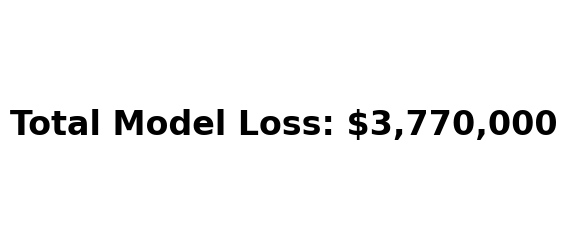

In [856]:
plt.figure(figsize=(6, 3))
plt.text(0.5, 0.5, f"Total Model Loss: ${total_loss:,}", fontsize=24, ha='center', va='center', fontweight='bold')
plt.axis('off')  # Hide axes
plt.show()

In [857]:
# Classification Report
final_cr_svm = classification_report(y_fl_test, final_y_pred_svm)
final_cr_svm

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.97      2983\n           1       0.94      0.91      0.92      1017\n\n    accuracy                           0.96      4000\n   macro avg       0.95      0.95      0.95      4000\nweighted avg       0.96      0.96      0.96      4000\n'

In [ ]:
# Display classification report and correlation matrix in a nice manner
print(f"\n===== Final Model Evaluation =====")
print("\nClassification Report:")
print(final_cr_svm)
print(f"Confusion Matrix:")
ConfusionMatrixDisplay(final_cm_svm).plot();

In [ ]:
# Compute permutation importance for SVM
perm_importance = permutation_importance(final_model, X_fl_test, y_fl_test, scoring=custom_scorer)

# Create Dataframe to contain feature name and the feature score
features_df = pd.DataFrame({'Feature_Name': X_fl_test.columns, 'Feature_Importance': np.abs(perm_importance.importances_mean)})

# Sort the dataframe in order of most importance
features_df = features_df.sort_values(by='Feature_Importance', ascending=False)

features_df

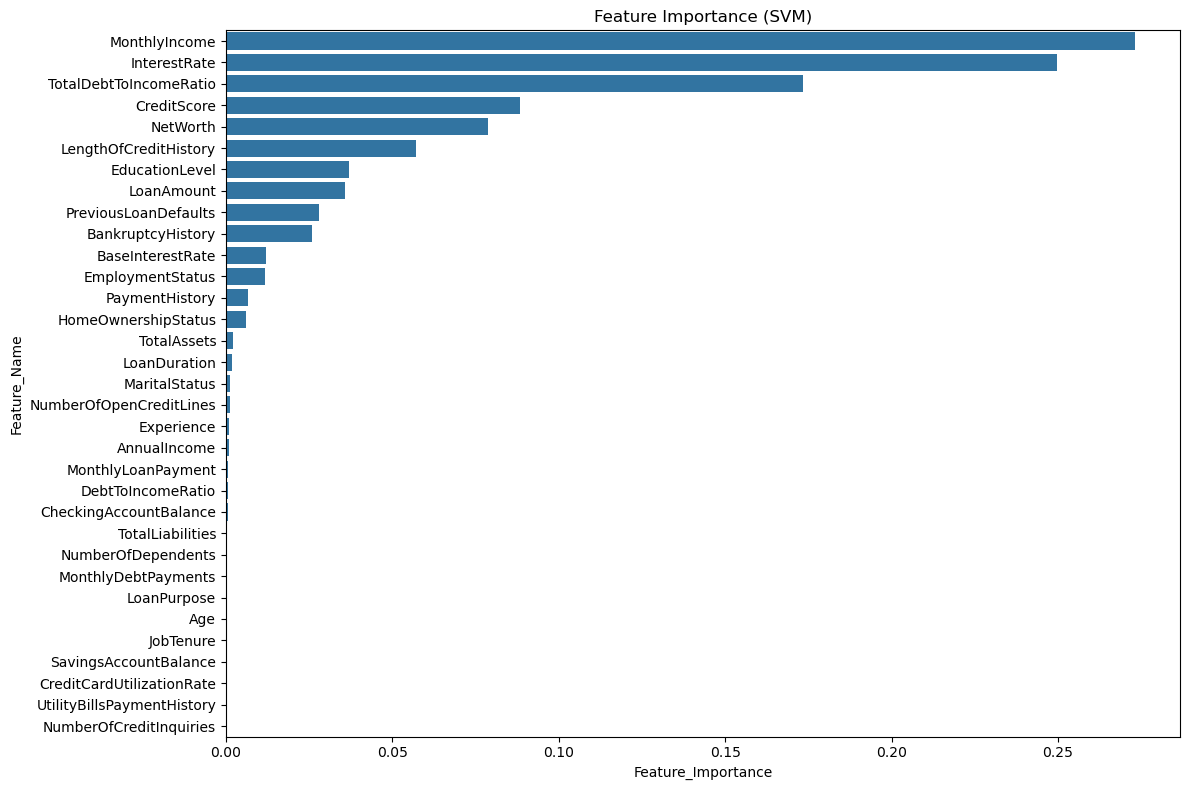

In [854]:
# Bar chart to display level of importance per feature
plt.figure(figsize=(12, 8))
sns.barplot(data=features_df, x='Feature_Importance', y='Feature_Name')
plt.title('Feature Importance (SVM)')
plt.tight_layout()
plt.show()

0.995069075465659


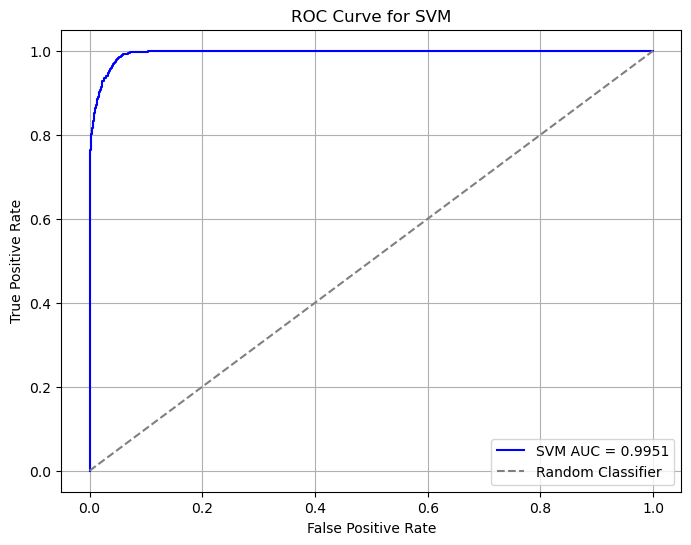

In [855]:
# Calculate and display the AOC score and ROC curve
auc_svm = roc_auc_score(y_fl_test, final_y_proba_svm)
print(auc_svm)

fpr, tpr, threshold = roc_curve(y_fl_test, final_y_proba_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SVM AUC = {auc_svm:.4f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend()
plt.grid()
plt.show()